### **Dataset Problem Statement**
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

https://www.kaggle.com/datasets/parisrohan/credit-score-classification

# Imports

In [1180]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression



# Load datasets

In [1181]:
# Load the dataset
all = pd.read_csv("train.csv", sep=",")

<ipython-input-1181-fe7870173650>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  all = pd.read_csv("train.csv", sep=",")


# Split tameplate

In [1182]:
# train = all.sample(frac=0.8,random_state=42) #random state is a seed value
# test = all.drop(train.index)


alternative

In [1183]:
#from sklearn.model_selection import train_test_split
train, test = train_test_split(all, test_size=0.3, random_state=42, stratify=all['Credit_Score']) # this would return ndarray
# X, y = all.loc[:, all.columns != 'Credit_Score'], all['Credit_Score']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42)



# Datasets

## General information about datasets

In [1184]:
# Display the first few rows of the dataset
print("For train data:")
print(train.head())
print(train.info())
print(train.shape)
print(train.isnull().sum())

For train data:
            ID Customer_ID     Month              Name Age          SSN  \
55677  0x15c3b  CUS_0xad3f      June               NaN  37  152-57-8963   
29133   0xc0b3  CUS_0x6ea0      June  Jeremy Pelofskyy  18  966-14-9295   
57009  0x1640b  CUS_0x6b59  February    Suvashree Deyf  21  992-54-9955   
9705    0x4edf  CUS_0x15d5  February            Grantq  23  296-39-6431   
14380   0x6a42  CUS_0xc1cc       May            Vidyal  44  054-04-4459   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
55677  Developer      17559.88            1179.323333                  2  ...   
29133     Lawyer      8969.985                    NaN                  9  ...   
57009  Developer       29041.4            2646.116667                  3  ...   
9705     Teacher      72207.52            5881.293333                  6  ...   
14380  Architect     102626.97            8733.247500                  1  ...   

       Credit_Mix  Outstanding_Debt Credit_Uti

In [1185]:
print("For test data:")
print(test.head())
print(test.info())
print(test.shape)
print(test.isnull().sum())

For test data:
            ID Customer_ID    Month          Name Age          SSN  \
29191   0xc109  CUS_0x837f   August       Stellac  17  636-75-9520   
68811  0x1a931  CUS_0x98d4    April       Barkinl  32  784-94-1164   
78626  0x1e2b4  CUS_0xa736    March            Rd  21  120-08-5254   
30672   0xc9ba  CUS_0x5b28  January       Teresao  16  806-77-5618   
81438  0x1f32c  CUS_0x8752     July  Mikolajczaku  33  175-52-9172   

         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
29191  Entrepreneur      48356.66            4233.721667                  3   
68811       Manager     157814.32           13087.193333                  4   
78626  Entrepreneur     147058.64           12319.886667                  2   
30672       Teacher     72637.48_            6064.123333                  6   
81438       _______     12050.595            1159.216250                  6   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
29191  ...    Standa

## Dropping columns unimportant for prediction - TRAIN

In [1186]:
train.columns
train_important = train[['Age','Annual_Income','Monthly_Inhand_Salary',
       'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Occupation',
       'Credit_Score']]
train_important.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation', 'Credit_Score'],
      dtype='object')

## Dropping columns unimportant for prediction - TEST

In [1187]:
test_important = test[['Age','Annual_Income','Monthly_Inhand_Salary',
       'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Occupation', 'Credit_Score']]
test_important.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Occupation', 'Credit_Score'],
      dtype='object')

## Cleaning data - TRAIN

### Age

In [1188]:
print(train_important['Age'].isnull().sum())
print(train_important['Age'].describe())

0
count     70000
unique     1296
top          28
freq       1971
Name: Age, dtype: object


In [1189]:

train_important['Age_clean'] = train_important['Age'].apply(lambda x: str(x).rstrip('_'))
#print(train_important.Age_clean[:11])
#train_important.dtypes
print(train_important['Age_clean'].isnull().sum())
print(train_important['Age_clean'].describe())

0
count     70000
unique     1245
top          28
freq       2070
Name: Age_clean, dtype: object


<ipython-input-1189-90d82f369bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_important['Age_clean'] = train_important['Age'].apply(lambda x: str(x).rstrip('_'))


In [1190]:
train_important['Age_clean_int'] = pd.to_numeric(train_important['Age_clean'], errors='coerce').astype('Int64')
age_median = train_important['Age_clean_int'].median().astype(int)

<ipython-input-1190-63fc261ade96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_important['Age_clean_int'] = pd.to_numeric(train_important['Age_clean'], errors='coerce').astype('Int64')


In [1191]:
train_important['Age_replaced_na'] = train_important['Age'].fillna(999999)

<ipython-input-1191-08aec9733b18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_important['Age_replaced_na'] = train_important['Age'].fillna(999999)


In [1192]:
train_important['Age_replaced_na_wo_na'] = train_important['Age_replaced_na'].replace(999999, 'age_median')

<ipython-input-1192-ec50d78ca5e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_important['Age_replaced_na_wo_na'] = train_important['Age_replaced_na'].replace(999999, 'age_median')


In [1193]:

train_important['Age_replaced_na_wo_na_clean'] = train_important['Age_replaced_na_wo_na'].apply(lambda x: str(x).rstrip('_'))

<ipython-input-1193-21cc1fe5d9ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_important['Age_replaced_na_wo_na_clean'] = train_important['Age_replaced_na_wo_na'].apply(lambda x: str(x).rstrip('_'))


In [1194]:
print(train_important['Age_replaced_na_wo_na_clean'].isnull().sum())
print(train_important['Age_replaced_na_wo_na_clean'].describe())
print(train_important.dtypes)

0
count     70000
unique     1245
top          28
freq       2070
Name: Age_replaced_na_wo_na_clean, dtype: object
Age                             object
Annual_Income                   object
Monthly_Inhand_Salary          float64
Num_Bank_Accounts                int64
Num_Credit_Card                  int64
Interest_Rate                    int64
Num_of_Loan                     object
Delay_from_due_date              int64
Num_of_Delayed_Payment          object
Changed_Credit_Limit            object
Num_Credit_Inquiries           float64
Credit_Mix                      object
Outstanding_Debt                object
Credit_Utilization_Ratio       float64
Credit_History_Age              object
Payment_of_Min_Amount           object
Total_EMI_per_month            float64
Amount_invested_monthly         object
Payment_Behaviour               object
Monthly_Balance                 object
Occupation                      object
Credit_Score                    object
Age_clean                  

In [1195]:
# Convert the 'Age_replaced_na_wo_na' column to integer type
train_important['Age_replaced_na_wo_na_clean_int'] = train_important['Age_replaced_na_wo_na_clean'].astype(int)

print(train_important['Age_replaced_na_wo_na_clean_int'].isnull().sum())
print(train_important['Age_replaced_na_wo_na_clean_int'].describe())
print(train_important.dtypes)


0
count    70000.000000
mean       110.216700
std        686.872704
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age_replaced_na_wo_na_clean_int, dtype: float64
Age                                 object
Annual_Income                       object
Monthly_Inhand_Salary              float64
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                        int64
Num_of_Loan                         object
Delay_from_due_date                  int64
Num_of_Delayed_Payment              object
Changed_Credit_Limit                object
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                    object
Credit_Utilization_Ratio           float64
Credit_History_Age                  object
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly             o

In [1196]:
# more than 150 accounts and negative amount of account replaced with median
age_replaced_na_wo_na_clean_reasonable_median = train_important['Age_replaced_na_wo_na_clean_int'].median()
train_important['Age_replaced_na_wo_na_clean_int_reasonable'] = train_important['Age_replaced_na_wo_na_clean_int'].copy()
train_important.loc[(train_important['Age_replaced_na_wo_na_clean_int_reasonable'] > 150) | (train_important['Age_replaced_na_wo_na_clean_int_reasonable'] < 0), 'Age_replaced_na_wo_na_clean_int_reasonable'] = age_replaced_na_wo_na_clean_reasonable_median

print(train_important['Age_replaced_na_wo_na_clean_int_reasonable'].describe())
print( train_important['Age_replaced_na_wo_na_clean_int_reasonable'].isnull().sum())

count    70000.000000
mean        33.311929
std         10.667126
min         14.000000
25%         25.000000
50%         33.000000
75%         41.000000
max        146.000000
Name: Age_replaced_na_wo_na_clean_int_reasonable, dtype: float64
0


### Annual_Income

In [1197]:
# Replace values ending with '_' with the corresponding number
train_important['Annual_Income_clean'] = train_important['Annual_Income'].apply(lambda x: str(x).rstrip('_'))
print(train_important.Annual_Income_clean[15:20])
train_important.dtypes

96672     77456.76
722      139354.48
30008      60040.5
7714      58537.38
23917     22182.95
Name: Annual_Income_clean, dtype: object


Age                                            object
Annual_Income                                  object
Monthly_Inhand_Salary                         float64
Num_Bank_Accounts                               int64
Num_Credit_Card                                 int64
Interest_Rate                                   int64
Num_of_Loan                                    object
Delay_from_due_date                             int64
Num_of_Delayed_Payment                         object
Changed_Credit_Limit                           object
Num_Credit_Inquiries                          float64
Credit_Mix                                     object
Outstanding_Debt                               object
Credit_Utilization_Ratio                      float64
Credit_History_Age                             object
Payment_of_Min_Amount                          object
Total_EMI_per_month                           float64
Amount_invested_monthly                        object
Payment_Behaviour           

In [1198]:
# Convert the 'Annual_Income' column to float type
train_important['Annual_Income_clean_float'] = train_important['Annual_Income_clean'].astype(float)
train_important['Annual_Income_clean_float_round'] = round(train_important['Annual_Income_clean_float'], 2)

print(train_important['Annual_Income_clean_float_round'].head())

55677     17559.88
29133      8969.98
57009     29041.40
9705      72207.52
14380    102626.97
Name: Annual_Income_clean_float_round, dtype: float64


In [1199]:
print(train_important['Annual_Income_clean_float_round'].describe())

print( train_important['Annual_Income_clean_float_round'].isnull().sum())

count    7.000000e+04
mean     1.749787e+05
std      1.426675e+06
min      7.005930e+03
25%      1.941589e+04
50%      3.742188e+04
75%      7.261755e+04
max      2.419806e+07
Name: Annual_Income_clean_float_round, dtype: float64
0


### Monthly_Inhand_Salary

In [1200]:
print(train_important['Monthly_Inhand_Salary'].describe())
print( train_important['Monthly_Inhand_Salary'].isnull().sum())

count    59464.000000
mean      4187.874068
std       3185.702661
min        303.645417
25%       1623.396667
50%       3081.902500
75%       5941.093333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64
10536


In [1201]:
monthly_inhand_salary_median = train_important['Monthly_Inhand_Salary'].median()
train_important['Monthly_Inhand_Salary_wo_na'] = train_important['Monthly_Inhand_Salary'].fillna(monthly_inhand_salary_median)

train_important['Monthly_Inhand_Salary_wo_na_round'] = round(train_important['Monthly_Inhand_Salary_wo_na'], 2)


print(train_important['Monthly_Inhand_Salary_wo_na_round'].describe())
print( train_important['Monthly_Inhand_Salary_wo_na_round'].isnull().sum())
train_important['Monthly_Inhand_Salary_wo_na_round'].head()

count    70000.000000
mean      4021.409141
std       2962.693442
min        303.650000
25%       1790.160000
50%       3081.900000
75%       5352.260000
max      15204.630000
Name: Monthly_Inhand_Salary_wo_na_round, dtype: float64
0


55677    1179.32
29133    3081.90
57009    2646.12
9705     5881.29
14380    8733.25
Name: Monthly_Inhand_Salary_wo_na_round, dtype: float64

### Num_Bank_Accounts

In [1202]:
print(train_important['Num_Bank_Accounts'].describe())
print( train_important['Num_Bank_Accounts'].isnull().sum())

# unique values of Num_Bank_Accounts
print(train_important['Num_Bank_Accounts'].value_counts())
print(len(train_important['Num_Bank_Accounts'].value_counts()))


count    70000.000000
mean        17.066529
std        116.874426
min         -1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
0
Num_Bank_Accounts
6       9093
8       8979
7       8919
5       8555
4       8524
        ... 
1014       1
845        1
907        1
84         1
1371       1
Name: count, Length: 737, dtype: int64
737


<function matplotlib.pyplot.show(close=None, block=None)>

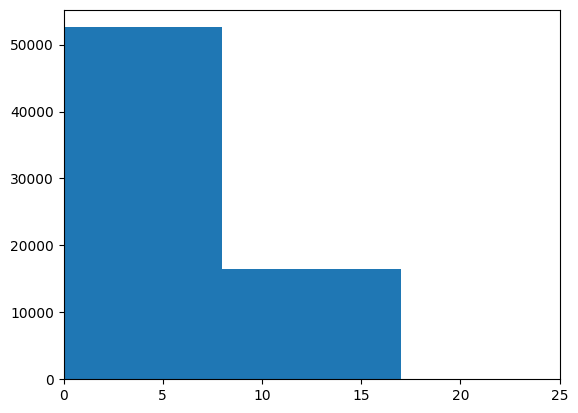

In [1203]:
plt.hist(train_important['Num_Bank_Accounts'], bins=200)
plt.xlim(0,25)
plt.show

In [1204]:
print(train_important['Num_Bank_Accounts'].gt(20).value_counts())

print(train_important['Num_Bank_Accounts'].gt(10).value_counts())

print(train_important['Num_Bank_Accounts'].gt(9).value_counts())

Num_Bank_Accounts
False    69076
True       924
Name: count, dtype: int64
Num_Bank_Accounts
False    69072
True       928
Name: count, dtype: int64
Num_Bank_Accounts
False    65371
True      4629
Name: count, dtype: int64


In [1205]:
# more than 25 accounts and negative amount of account replaced with median
num_bank_accounts_median = train_important['Num_Bank_Accounts'].median()
train_important['Num_Bank_Accounts_reasonable'] = train_important['Num_Bank_Accounts'].copy()
train_important.loc[(train_important['Num_Bank_Accounts_reasonable'] > 25) | (train_important['Num_Bank_Accounts_reasonable'] < 0), 'Num_Bank_Accounts_reasonable'] = num_bank_accounts_median

print(train_important['Num_Bank_Accounts_reasonable'].value_counts())
print(len(train_important['Num_Bank_Accounts_reasonable'].value_counts()))

Num_Bank_Accounts_reasonable
6     10033
8      8979
7      8919
5      8555
4      8524
3      8312
9      3810
10     3701
1      3148
2      3011
0      3004
11        3
18        1
Name: count, dtype: int64
13


### Num_Credit_Card

In [1206]:
print(train_important['Num_Credit_Card'].describe())
print( train_important['Num_Credit_Card'].isnull().sum())

# unique values of Num_Credit_Card
print(train_important['Num_Credit_Card'].value_counts())
print(len(train_important['Num_Credit_Card'].value_counts()))


count    70000.000000
mean        22.311029
std        129.021291
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64
0
Num_Credit_Card
5       12893
7       11667
6       11598
4        9795
3        9301
        ...  
1016        1
1384        1
883         1
598         1
712         1
Name: count, Length: 990, dtype: int64
990


<function matplotlib.pyplot.show(close=None, block=None)>

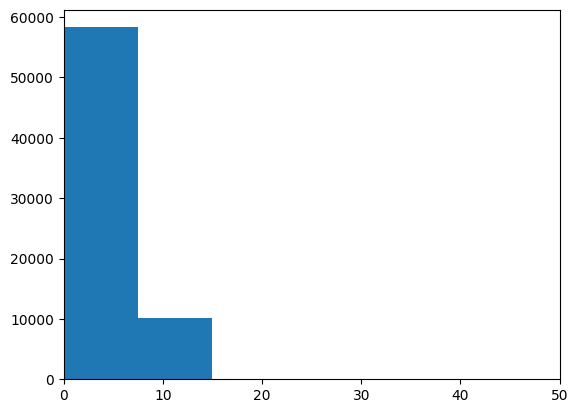

In [1207]:
plt.hist(train_important['Num_Credit_Card'], bins=200)
plt.xlim(0,50)
plt.show

In [1208]:
print(train_important['Num_Credit_Card'].gt(9).value_counts())

print(train_important['Num_Credit_Card'].gt(15).value_counts())

print(train_important['Num_Credit_Card'].gt(10).value_counts())

Num_Credit_Card
False    65014
True      4986
Name: count, dtype: int64
Num_Credit_Card
False    68449
True      1551
Name: count, dtype: int64
Num_Credit_Card
False    68419
True      1581
Name: count, dtype: int64


In [1209]:
# more than 10 accounts and less than 1 amount of account replaced with median
num_credit_card_median = train_important['Num_Credit_Card'].median()
train_important['Num_Credit_Card_reasonable'] = train_important['Num_Credit_Card'].copy()
train_important.loc[(train_important['Num_Credit_Card_reasonable'] > 10) | (train_important['Num_Credit_Card_reasonable'] < 0), 'Num_Credit_Card_reasonable'] = num_credit_card_median

print(train_important['Num_Credit_Card_reasonable'].value_counts())
print(len(train_important['Num_Credit_Card_reasonable'].value_counts()))

Num_Credit_Card_reasonable
5     14474
7     11667
6     11598
4      9795
3      9301
8      3476
10     3405
9      3240
2      1524
1      1509
0        11
Name: count, dtype: int64
11


### Interest_Rate

In [1210]:
print(train_important['Interest_Rate'].describe())
print( train_important['Interest_Rate'].isnull().sum())

# unique values of Interest_Rate
print(train_important['Interest_Rate'].value_counts())
print(len(train_important['Interest_Rate'].value_counts()))


count    70000.000000
mean        71.279643
std        462.948925
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64
0
Interest_Rate
8       3519
5       3488
6       3333
7       3156
12      3148
        ... 
3433       1
3496       1
2779       1
259        1
4755       1
Name: count, Length: 1271, dtype: int64
1271


<function matplotlib.pyplot.show(close=None, block=None)>

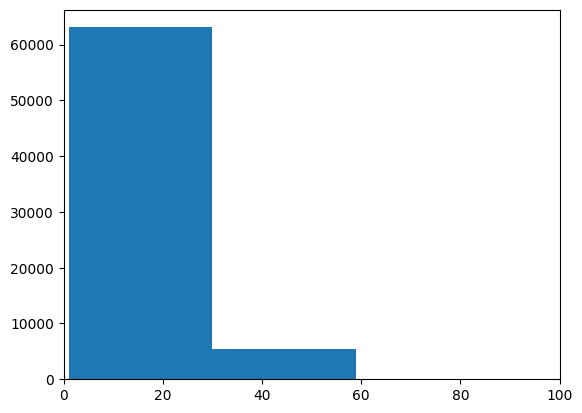

In [1211]:
plt.hist(train_important['Interest_Rate'], bins=200)
plt.xlim(0,100)
plt.show

In [1212]:
print(train_important['Interest_Rate'].gt(35).value_counts())

print(train_important['Interest_Rate'].gt(33).value_counts())

print(train_important['Interest_Rate'].gt(34).value_counts())

Interest_Rate
False    68610
True      1390
Name: count, dtype: int64
Interest_Rate
False    67563
True      2437
Name: count, dtype: int64
Interest_Rate
False    68610
True      1390
Name: count, dtype: int64


In [1213]:
# more than 34 accounts and less than 0 amount of account replaced with median
interest_rate_median = train_important['Interest_Rate'].median()
train_important['Interest_Rate_reasonable'] = train_important['Interest_Rate'].copy()
train_important.loc[(train_important['Interest_Rate_reasonable'] > 34) | (train_important['Interest_Rate_reasonable'] < 0), 'Interest_Rate_reasonable'] = interest_rate_median

print(train_important['Interest_Rate_reasonable'].value_counts())
print(len(train_important['Interest_Rate_reasonable'].value_counts()))

print(train_important['Interest_Rate_reasonable'].describe())

Interest_Rate_reasonable
8     3519
5     3488
6     3333
7     3156
12    3148
10    3147
9     3141
11    3073
13    3064
18    2853
20    2805
15    2796
16    2659
17    2630
19    2495
3     1917
1     1895
4     1830
2     1710
14    1546
22    1237
30    1219
32    1209
24    1185
23    1173
29    1167
27    1138
28    1124
21    1110
25    1103
26    1050
34    1047
31    1029
33    1004
Name: count, dtype: int64
34
count    70000.000000
mean        14.509443
std          8.658739
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate_reasonable, dtype: float64


### Num_of_Loan

In [1214]:
print(train_important['Num_of_Loan'].describe())
print( train_important['Num_of_Loan'].isnull().sum())

count     70000
unique      340
top           3
freq      10053
Name: Num_of_Loan, dtype: object
0


In [1215]:
# removeing _
train_important['Num_of_Loan_clean'] = train_important['Num_of_Loan'].apply(lambda x: str(x).rstrip('_'))

In [1216]:
print(train_important['Num_of_Loan_clean'].describe())
print( train_important['Num_of_Loan_clean'].isnull().sum())

count     70000
unique      326
top           3
freq      10555
Name: Num_of_Loan_clean, dtype: object
0


In [1217]:
train_important['Num_of_Loan_clean_wo_na'] = train_important['Num_of_Loan_clean'].str.replace(r'nan', r'0')

In [1218]:
# Convert the 'Num_of_Loan_clean' column to integer type
train_important['Num_of_Loan_clean_wo_na_int'] = train_important['Num_of_Loan_clean_wo_na'].astype(int)

In [1219]:
print(train_important['Num_of_Loan_clean_wo_na_int'].describe())
print( train_important['Num_of_Loan_clean_wo_na_int'].isnull().sum())


count    70000.000000
mean         3.149814
std         63.990380
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1484.000000
Name: Num_of_Loan_clean_wo_na_int, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

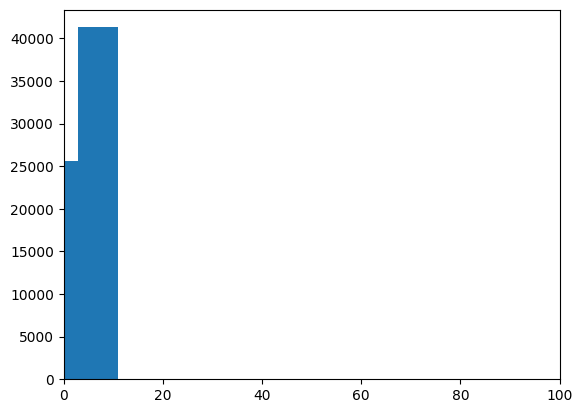

In [1220]:
plt.hist(train_important['Num_of_Loan_clean_wo_na_int'], bins=200)
plt.xlim(0,100)
plt.show

In [1221]:
print(train_important['Num_of_Loan_clean_wo_na_int'].gt(20).value_counts())

print(train_important['Num_of_Loan_clean_wo_na_int'].gt(8).value_counts())

print(train_important['Num_of_Loan_clean_wo_na_int'].gt(11).value_counts())

Num_of_Loan_clean_wo_na_int
False    69652
True       348
Name: count, dtype: int64
Num_of_Loan_clean_wo_na_int
False    67044
True      2956
Name: count, dtype: int64
Num_of_Loan_clean_wo_na_int
False    69650
True       350
Name: count, dtype: int64


In [1222]:
num_of_loan_clean_wo_na_int_reasonable_median = train_important['Num_of_Loan_clean_wo_na_int'].median()
train_important['Num_of_Loan_clean_wo_na_int_reasonable'] = train_important['Num_of_Loan_clean_wo_na_int'].copy()
train_important.loc[(train_important['Num_of_Loan_clean_wo_na_int_reasonable'] > 15) | (train_important['Num_of_Loan_clean_wo_na_int_reasonable'] < 0), 'Num_of_Loan_clean_wo_na_int_reasonable'] = num_of_loan_clean_wo_na_int_reasonable_median

print(train_important['Num_of_Loan_clean_wo_na_int_reasonable'].value_counts())
print(len(train_important['Num_of_Loan_clean_wo_na_int_reasonable'].value_counts()))

print(train_important['Num_of_Loan_clean_wo_na_int_reasonable'].describe())

Num_of_Loan_clean_wo_na_int_reasonable
3    13653
2    10539
4    10274
0     7664
1     7399
6     5477
7     5160
5     4984
9     2606
8     2244
Name: count, dtype: int64
10
count    70000.000000
mean         3.512000
std          2.398647
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan_clean_wo_na_int_reasonable, dtype: float64


### Delay_from_due_date


In [1223]:
print(train_important['Delay_from_due_date'].describe())
print( train_important['Delay_from_due_date'].isnull().sum())

# unique values of Delay_from_due_date
print(train_important['Delay_from_due_date'].value_counts())
print(len(train_important['Delay_from_due_date'].value_counts()))


count    70000.000000
mean        21.077500
std         14.833653
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
0
Delay_from_due_date
 15    2510
 13    2386
 8     2318
 14    2304
 10    2287
       ... 
 64      43
 65      32
 66      22
-5       22
 67      13
Name: count, Length: 73, dtype: int64
73


In [1224]:
# more than 40 accounts and less than 0 amount of account replaced with quantile25
delay_from_due_date_quantile25 = train_important['Delay_from_due_date'].quantile(0.25)
train_important['Delay_from_due_date_reasonable'] = train_important['Delay_from_due_date'].copy()
train_important.loc[(train_important['Delay_from_due_date_reasonable'] < 0), 'Delay_from_due_date_reasonable'] = delay_from_due_date_quantile25

print(train_important['Delay_from_due_date_reasonable'].value_counts())
print(len(train_important['Delay_from_due_date_reasonable'].value_counts()))

print(train_important['Delay_from_due_date_reasonable'].describe())

Delay_from_due_date_reasonable
10    2711
15    2510
13    2386
8     2318
14    2304
      ... 
63      54
64      43
65      32
66      22
67      13
Name: count, Length: 68, dtype: int64
68
count    70000.000000
mean        21.151543
std         14.747129
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date_reasonable, dtype: float64


### Num_of_Delayed_Payment

In [1225]:
print(train_important['Num_of_Delayed_Payment'].describe())
print( train_important['Num_of_Delayed_Payment'].isnull().sum())

count     65143
unique      563
top          19
freq       3708
Name: Num_of_Delayed_Payment, dtype: object
4857


In [1226]:
# Nan to 0
train_important['Num_of_Delayed_Payment_wo_na'] = train_important['Num_of_Delayed_Payment'].fillna(0)

In [1227]:
# removeing _
train_important['Num_of_Delayed_Payment_wo_na_clean'] = train_important['Num_of_Delayed_Payment_wo_na'].apply(lambda x: str(x).rstrip('_'))

In [1228]:
train_important['Num_of_Delayed_Payment_wo_na_clean'][:10]

55677     6
29133    21
57009     0
9705     25
14380     6
47014     8
52908    12
75084    24
94688    21
87049    15
Name: Num_of_Delayed_Payment_wo_na_clean, dtype: object

In [1229]:
# Convert the 'Num_of_Delayed_Payment_wo_na_clean' column to integer type
train_important['Num_of_Delayed_Payment_wo_na_clean_int'] = train_important['Num_of_Delayed_Payment_wo_na_clean'].astype(int)

In [1230]:
print(train_important['Num_of_Delayed_Payment_wo_na_clean_int'].describe())
print( train_important['Num_of_Delayed_Payment_wo_na_clean_int'].isnull().sum())

count    70000.000000
mean        29.670357
std        226.299512
min         -3.000000
25%          8.000000
50%         13.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment_wo_na_clean_int, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

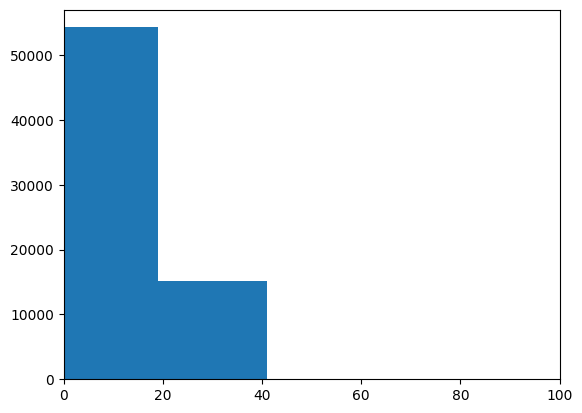

In [1231]:
plt.hist(train_important['Num_of_Delayed_Payment_wo_na_clean_int'], bins=200)
plt.xlim(0,100)
plt.show

In [1232]:
print(train_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(35).value_counts())

print(train_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(8).value_counts())

print(train_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(13).value_counts())

Num_of_Delayed_Payment_wo_na_clean_int
False    69474
True       526
Name: count, dtype: int64
Num_of_Delayed_Payment_wo_na_clean_int
True     50352
False    19648
Name: count, dtype: int64
Num_of_Delayed_Payment_wo_na_clean_int
False    36670
True     33330
Name: count, dtype: int64


In [1233]:
# more than 40  and less than 0 amount replaced with median
num_of_delayed_payment_wo_na_clean_int_median = train_important['Num_of_Delayed_Payment_wo_na_clean_int'].median()
train_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] = train_important['Num_of_Delayed_Payment_wo_na_clean_int'].copy()
train_important.loc[(train_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] > 40) | (train_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] < 0), 'Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] = num_of_delayed_payment_wo_na_clean_int_median

print(len(train_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'].value_counts()))

print(train_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'].describe())

29
count    70000.000000
mean        12.493700
std          6.861968
min          0.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment_wo_na_clean_int_reasonable, dtype: float64


### Changed_Credit_Limit

In [1234]:
# _ to 0
train_important['Changed_Credit_Limit_wo_na'] = train_important['Changed_Credit_Limit'].str.replace(r'_', r'0')

In [1235]:
print(train_important['Changed_Credit_Limit_wo_na'].describe())
print( train_important['Changed_Credit_Limit_wo_na'].isnull().sum())

count     70000
unique     4138
top           0
freq       1484
Name: Changed_Credit_Limit_wo_na, dtype: object
0


In [1236]:
# Convert the 'Changed_Credit_Limit_wo_na' column to float type
train_important['Changed_Credit_Limit_wo_na_float'] = train_important['Changed_Credit_Limit_wo_na'].astype(float)

In [1237]:
print(train_important['Changed_Credit_Limit_wo_na_float'].describe())
print( train_important['Changed_Credit_Limit_wo_na_float'].isnull().sum())

count    70000.000000
mean        10.176279
std          6.881739
min         -6.490000
25%          4.970000
50%          9.250000
75%         14.660000
max         36.970000
Name: Changed_Credit_Limit_wo_na_float, dtype: float64
0


In [1238]:
# negative percentage to positive
train_important['Changed_Credit_Limit_wo_na_float_pos'] = train_important['Changed_Credit_Limit_wo_na_float'].abs()

In [1239]:
print(train_important['Changed_Credit_Limit_wo_na_float_pos'].describe())
print( train_important['Changed_Credit_Limit_wo_na_float_pos'].isnull().sum())

count    70000.000000
mean        10.250370
std          6.770884
min          0.000000
25%          5.000000
50%          9.250000
75%         14.660000
max         36.970000
Name: Changed_Credit_Limit_wo_na_float_pos, dtype: float64
0


### Num_Credit_Inquiries

In [1240]:
print(train_important['Num_Credit_Inquiries'].describe())
print( train_important['Num_Credit_Inquiries'].isnull().sum())

count    68656.000000
mean        28.321108
std        194.979320
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
1344


In [1241]:
train_important['Num_Credit_Inquiries_wo_na'] = train_important['Num_Credit_Inquiries'].fillna(train_important['Num_Credit_Inquiries'].median())

In [1242]:
print(train_important['Num_Credit_Inquiries_wo_na'].describe())
print( train_important['Num_Credit_Inquiries_wo_na'].isnull().sum())

count    70000.000000
mean        27.892543
std        193.122712
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries_wo_na, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

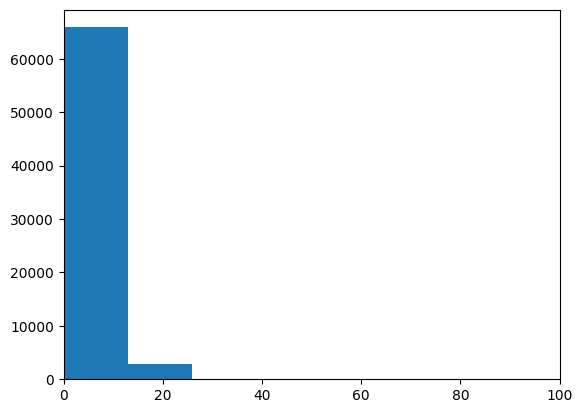

In [1243]:
plt.hist(train_important['Num_Credit_Inquiries_wo_na'], bins=200)
plt.xlim(0,100)
plt.show

In [1244]:
print(train_important['Num_Credit_Inquiries_wo_na'].gt(30).value_counts())

print(train_important['Num_Credit_Inquiries_wo_na'].gt(20).value_counts())

print(train_important['Num_Credit_Inquiries_wo_na'].gt(15).value_counts())

Num_Credit_Inquiries_wo_na
False    68808
True      1192
Name: count, dtype: int64
Num_Credit_Inquiries_wo_na
False    68806
True      1194
Name: count, dtype: int64
Num_Credit_Inquiries_wo_na
False    68270
True      1730
Name: count, dtype: int64


In [1245]:
# more than 30 replaced with median
num_credit_inquiries_wo_na_median = train_important['Num_Credit_Inquiries_wo_na'].median()
train_important['Num_Credit_Inquiries_wo_na_reasonable'] = train_important['Num_Credit_Inquiries_wo_na'].copy()
train_important.loc[(train_important['Num_Credit_Inquiries_wo_na_reasonable'] > 30), 'Num_Credit_Inquiries_wo_na_reasonable'] = num_credit_inquiries_wo_na_median

print(len(train_important['Num_Credit_Inquiries_wo_na_reasonable'].value_counts()))

print(train_important['Num_Credit_Inquiries_wo_na_reasonable'].describe())

20
count    70000.000000
mean         5.798857
std          3.798519
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         29.000000
Name: Num_Credit_Inquiries_wo_na_reasonable, dtype: float64


### Credit_Mix

In [1246]:
# unique values of credit_mix
credit_mix_counts = train_important['Credit_Mix'].value_counts()
print(credit_mix_counts)


Credit_Mix
Standard    25584
Good        16969
_           14132
Bad         13315
Name: count, dtype: int64


In [1247]:
# every "_" change to unknown
train_important['Credit_Mix_plus_unknown'] = train_important['Credit_Mix'].replace('_', 'Unknown')

credit_mix_counts = train_important['Credit_Mix_plus_unknown'].value_counts()
print(credit_mix_counts)


Credit_Mix_plus_unknown
Standard    25584
Good        16969
Unknown     14132
Bad         13315
Name: count, dtype: int64


### Outstanding_Debt
     

In [1248]:
print(train_important['Outstanding_Debt'].describe())
print( train_important['Outstanding_Debt'].isnull().sum())

count       70000
unique      12878
top       1109.03
freq           20
Name: Outstanding_Debt, dtype: object
0


In [1249]:
train_important['Outstanding_Debt_clean'] = train_important['Outstanding_Debt'].apply(lambda x: x.rstrip('_'))

In [1250]:
# Convert the 'Outstanding_Debt_clean' column to float type
train_important['Outstanding_Debt_clean_float'] = train_important['Outstanding_Debt_clean'].astype(float)

In [1251]:
print(train_important['Outstanding_Debt_clean_float'].describe())
print( train_important['Outstanding_Debt_clean_float'].isnull().sum())

count    70000.000000
mean      1426.756795
std       1158.675071
min          0.230000
25%        563.840000
50%       1163.400000
75%       1945.670000
max       4998.070000
Name: Outstanding_Debt_clean_float, dtype: float64
0


### Credit_Utilization_Ratio
no transformation needed

In [1252]:
print(train_important['Credit_Utilization_Ratio'].describe())
print( train_important['Credit_Utilization_Ratio'].isnull().sum())

count    70000.000000
mean        32.258348
std          5.116679
min         20.000000
25%         28.035167
50%         32.268208
75%         36.466465
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64
0


### Credit_History_Age

In [1253]:
# Extract months using regex

# Extract years
train_important['Credit_History_Age_years'] = train_important['Credit_History_Age'].str.extract(r'(\d+) Years').astype(float)

# Extract months and convert to numeric
train_important['Credit_History_Age_months'] = train_important['Credit_History_Age'].str.extract(r'(\d+) Months').astype(float)

# Calculate total months
train_important['Total_Credit_History_months'] = train_important['Credit_History_Age_years'].astype(float) * 12 + train_important['Credit_History_Age_months']

print(train_important['Total_Credit_History_months'].head())


55677    224.0
29133    120.0
57009    378.0
9705       NaN
14380    372.0
Name: Total_Credit_History_months, dtype: float64


In [1254]:
print(train_important['Total_Credit_History_months'].describe())
print( train_important['Total_Credit_History_months'].isnull().sum())

count    63650.000000
mean       221.045373
std         99.619711
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Total_Credit_History_months, dtype: float64
6350


In [1255]:
total_credit_history_number_median = train_important['Total_Credit_History_months'].median()
train_important['Total_Credit_History_months_wo_na'] = train_important['Total_Credit_History_months'].fillna(total_credit_history_number_median)

In [1256]:
print(train_important['Total_Credit_History_months_wo_na'].describe())
print( train_important['Total_Credit_History_months_wo_na'].isnull().sum())

count    70000.000000
mean       220.859829
std         94.995592
min          1.000000
25%        154.000000
50%        219.000000
75%        292.000000
max        404.000000
Name: Total_Credit_History_months_wo_na, dtype: float64
0


### Payment_of_Min_Amount
no transformation needed

In [1257]:
# unique values of Payment_of_Min_Amount
train_important['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    36634
No     24919
NM      8447
Name: count, dtype: int64

### Total_EMI_per_month
no transformation needed

In [1258]:
print(train_important['Total_EMI_per_month'].describe())
print( train_important['Total_EMI_per_month'].isnull().sum())

count    70000.000000
mean      1421.320998
std       8341.559570
min          0.000000
25%         30.306321
50%         68.896136
75%        160.877622
max      82331.000000
Name: Total_EMI_per_month, dtype: float64
0


In [1259]:
print(train_important['Total_EMI_per_month'].describe())
print( train_important['Total_EMI_per_month'].isnull().sum())

count    70000.000000
mean      1421.320998
std       8341.559570
min          0.000000
25%         30.306321
50%         68.896136
75%        160.877622
max      82331.000000
Name: Total_EMI_per_month, dtype: float64
0


### Amount_invested_monthly

In [1260]:
print(train_important['Amount_invested_monthly'].describe())
print( train_important['Amount_invested_monthly'].isnull().sum())

count         66873
unique        63700
top       __10000__
freq           3048
Name: Amount_invested_monthly, dtype: object
3127


In [1261]:
train_important['Amount_invested_monthly_clean'] = train_important['Amount_invested_monthly'].astype(str).apply(lambda x:  re.sub(r'^_+|_+$', '', x))


In [1262]:
train_important['Amount_invested_monthly_clean_float'] = train_important['Amount_invested_monthly_clean'].astype(float)


In [1263]:
amount_invested_monthly_clean_float_median = train_important['Amount_invested_monthly_clean_float'].median()
train_important['Amount_invested_monthly_clean_float_wo_na'] = train_important['Amount_invested_monthly_clean_float'].fillna(amount_invested_monthly_clean_float_median)

In [1264]:
print(train_important['Amount_invested_monthly_clean_float_wo_na'].describe())
print( train_important['Amount_invested_monthly_clean_float_wo_na'].isnull().sum())

count    70000.000000
mean       619.744643
std       2010.533173
min          0.000000
25%         76.874855
50%        135.935743
75%        254.717470
max      10000.000000
Name: Amount_invested_monthly_clean_float_wo_na, dtype: float64
0


### Payment_Behaviour

In [1265]:
train_important['Payment_Behaviour'].value_counts()


Payment_Behaviour
Low_spent_Small_value_payments      17862
High_spent_Medium_value_payments    12305
Low_spent_Medium_value_payments      9693
High_spent_Large_value_payments      9556
High_spent_Small_value_payments      7932
Low_spent_Large_value_payments       7319
!@9#%8                               5333
Name: count, dtype: int64

In [1266]:
train_important['Payment_Behaviour_plus_unknown'] = train_important['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

train_important['Payment_Behaviour_plus_unknown'].value_counts()


Payment_Behaviour_plus_unknown
Low_spent_Small_value_payments      17862
High_spent_Medium_value_payments    12305
Low_spent_Medium_value_payments      9693
High_spent_Large_value_payments      9556
High_spent_Small_value_payments      7932
Low_spent_Large_value_payments       7319
Unknown                              5333
Name: count, dtype: int64

### Monthly_Balance

In [1267]:
print(train_important['Monthly_Balance'].describe())
print( train_important['Monthly_Balance'].isnull().sum())

count                                69164
unique                               69159
top       __-333333333333333333333333333__
freq                                     6
Name: Monthly_Balance, dtype: object
836


In [1268]:
print(((train_important['Monthly_Balance']).value_counts()>1).sum())

1


In [1269]:
duplicate_values = train_important['Monthly_Balance'].value_counts()
duplicates_mask = train_important['Monthly_Balance'].isin(duplicate_values[duplicate_values > 1].index)
duplicate_rows = train_important[duplicates_mask]
print(duplicate_rows['Monthly_Balance'])

29158    __-333333333333333333333333333__
26177    __-333333333333333333333333333__
75251    __-333333333333333333333333333__
35570    __-333333333333333333333333333__
83255    __-333333333333333333333333333__
38622    __-333333333333333333333333333__
Name: Monthly_Balance, dtype: object


In [1270]:
print((train_important['Monthly_Balance'] == "__-333333333333333333333333333__").sum())

6


In [1271]:
train_important['Monthly_Balance_numbers'] = train_important['Monthly_Balance'].replace('__-333333333333333333333333333__', '-1')

In [1272]:
train_important['Monthly_Balance_numbers_float'] = train_important['Monthly_Balance_numbers'].astype(float)

In [1273]:
print(train_important['Monthly_Balance_numbers_float'].describe())
print( train_important['Monthly_Balance_numbers_float'].isnull().sum())

count    69164.000000
mean       402.153121
std        213.616149
min         -1.000000
25%        270.332466
50%        336.442215
75%        469.406008
max       1602.040519
Name: Monthly_Balance_numbers_float, dtype: float64
836


In [1274]:
train_important['Monthly_Balance_numbers_float_wo_na'] = train_important['Monthly_Balance_numbers_float'].fillna(0)

In [1275]:
print(train_important['Monthly_Balance_numbers_float_wo_na'].describe())
print( train_important['Monthly_Balance_numbers_float_wo_na'].isnull().sum())

count    70000.000000
mean       397.350264
std        216.784041
min         -1.000000
25%        268.237114
50%        334.511403
75%        466.987595
max       1602.040519
Name: Monthly_Balance_numbers_float_wo_na, dtype: float64
0


In [1276]:
monthly_balance_numbers_float_wo_na_median = train_important['Monthly_Balance_numbers_float_wo_na'].median()
train_important['Monthly_Balance_numbers_float_wo_na_reasonable'] = train_important['Monthly_Balance_numbers_float_wo_na'].copy()
train_important.loc[(train_important['Monthly_Balance_numbers_float_wo_na_reasonable'] < 0), 'Monthly_Balance_numbers_float_wo_na'] = monthly_balance_numbers_float_wo_na_median


print(train_important['Monthly_Balance_numbers_float_wo_na_reasonable'].describe())
print( train_important['Monthly_Balance_numbers_float_wo_na_reasonable'].isnull().sum())

count    70000.000000
mean       397.350264
std        216.784041
min         -1.000000
25%        268.237114
50%        334.511403
75%        466.987595
max       1602.040519
Name: Monthly_Balance_numbers_float_wo_na_reasonable, dtype: float64
0


### Occupation

In [1277]:
occupation_counts = train_important['Occupation'].value_counts()
print(occupation_counts)

Occupation
_______          4975
Lawyer           4589
Architect        4484
Mechanic         4442
Engineer         4408
Scientist        4407
Teacher          4368
Accountant       4355
Media_Manager    4346
Journalist       4320
Developer        4309
Doctor           4262
Entrepreneur     4246
Manager          4228
Musician         4146
Writer           4115
Name: count, dtype: int64


In [1278]:
train_important['Occupation_plus_unknown'] = train_important['Occupation'].replace('_______', 'Unknown')

train_important['Occupation_plus_unknown'].value_counts()

Occupation_plus_unknown
Unknown          4975
Lawyer           4589
Architect        4484
Mechanic         4442
Engineer         4408
Scientist        4407
Teacher          4368
Accountant       4355
Media_Manager    4346
Journalist       4320
Developer        4309
Doctor           4262
Entrepreneur     4246
Manager          4228
Musician         4146
Writer           4115
Name: count, dtype: int64

###  Credit_Score
no transformation needed

In [1279]:
credit_score_counts = train_important['Credit_Score'].value_counts()
print(credit_score_counts)

Credit_Score
Standard    37222
Poor        20299
Good        12479
Name: count, dtype: int64


### deleting old columns - TRAIN

In [1280]:
#remove old age
train_important.drop(columns=['Age'], inplace=True)
train_important.drop(columns=['Age_clean'], inplace=True)
train_important.drop(columns=['Age_clean_int'], inplace=True)
#train_important.drop(columns=['Age_clean_int_replased'], inplace=True)

train_important.drop(columns=['Age_replaced_na'], inplace=True)
train_important.drop(columns=['Age_replaced_na_wo_na'], inplace=True)
train_important.drop(columns=['Age_replaced_na_wo_na_clean'], inplace=True)
train_important.drop(columns=['Age_replaced_na_wo_na_clean_int'], inplace=True)



In [1281]:
#remove old anual_income
train_important.drop(columns=['Annual_Income'], inplace=True)
train_important.drop(columns=['Annual_Income_clean'], inplace=True)
train_important.drop(columns=['Annual_Income_clean_float'], inplace=True)

In [1282]:
#remove old Monthly_Inhand_Salary
train_important.drop(columns=['Monthly_Inhand_Salary'], inplace=True)
train_important.drop(columns=['Monthly_Inhand_Salary_wo_na'], inplace=True)

In [1283]:
#remove old Num_Bank_Accounts
train_important.drop(columns=['Num_Bank_Accounts'], inplace=True)

In [1284]:
#remove old Num_Credit_Card
train_important.drop(columns=['Num_Credit_Card'], inplace=True)

In [1285]:
#remove old Interest_Rate
train_important.drop(columns=['Interest_Rate'], inplace=True)

In [1286]:
#remove old Num_of_Loan
train_important.drop(columns=['Num_of_Loan'], inplace=True)
train_important.drop(columns=['Num_of_Loan_clean'], inplace=True)
train_important.drop(columns=['Num_of_Loan_clean_wo_na'], inplace=True)
train_important.drop(columns=['Num_of_Loan_clean_wo_na_int'], inplace=True)


In [1287]:
#remove old Delay_from_due_date
train_important.drop(columns=['Delay_from_due_date'], inplace=True)

In [1288]:
#remove old Num_of_Delayed_Payment
train_important.drop(columns=['Num_of_Delayed_Payment'], inplace=True)
train_important.drop(columns=['Num_of_Delayed_Payment_wo_na'], inplace=True)
train_important.drop(columns=['Num_of_Delayed_Payment_wo_na_clean'], inplace=True)
train_important.drop(columns=['Num_of_Delayed_Payment_wo_na_clean_int'], inplace=True)

In [1289]:
#remove old Changed_Credit_Limit
train_important.drop(columns=['Changed_Credit_Limit'], inplace=True)
train_important.drop(columns=['Changed_Credit_Limit_wo_na'], inplace=True)
train_important.drop(columns=['Changed_Credit_Limit_wo_na_float'], inplace=True)

In [1290]:
#remove old Num_Credit_Inquiries
train_important.drop(columns=['Num_Credit_Inquiries'], inplace=True)
train_important.drop(columns=['Num_Credit_Inquiries_wo_na'], inplace=True)

In [1291]:
#remove old Credit_Mix
train_important.drop(columns=['Credit_Mix'], inplace=True)


In [1292]:
#remove old Outstanding_Debt
train_important.drop(columns=['Outstanding_Debt'], inplace=True)
train_important.drop(columns=['Outstanding_Debt_clean'], inplace=True)

In [1293]:
#remove old Credit_History_Age
train_important.drop(columns=['Credit_History_Age'], inplace=True)
train_important.drop(columns=['Credit_History_Age_years'], inplace=True)
train_important.drop(columns=['Credit_History_Age_months'], inplace=True)
train_important.drop(columns=['Total_Credit_History_months'], inplace=True)

In [1294]:
#remove old Amount_invested_monthly
train_important.drop(columns=['Amount_invested_monthly'], inplace=True)
train_important.drop(columns=['Amount_invested_monthly_clean'], inplace=True)
train_important.drop(columns=['Amount_invested_monthly_clean_float'], inplace=True)

In [1295]:
#remove old Payment_Behaviour
train_important.drop(columns=['Payment_Behaviour'], inplace=True)

In [1296]:
#remove old Monthly_Balance
train_important.drop(columns=['Monthly_Balance'], inplace=True)
train_important.drop(columns=['Monthly_Balance_numbers'], inplace=True)
train_important.drop(columns=['Monthly_Balance_numbers_float'], inplace=True)
train_important.drop(columns=['Monthly_Balance_numbers_float_wo_na'], inplace=True)

In [1297]:
#remove old Occupation
train_important.drop(columns=['Occupation'], inplace=True)

## Cleaning data - TEST

### Age

In [1298]:
print(test_important['Age'].isnull().sum())
print(test_important['Age'].describe())

0
count     30000
unique      657
top          38
freq        880
Name: Age, dtype: object


In [1299]:

test_important['Age_clean'] = test_important['Age'].apply(lambda x: str(x).rstrip('_'))
#print(test_important.Age_clean[:11])
#test_important.dtypes
print(test_important['Age_clean'].isnull().sum())
print(test_important['Age_clean'].describe())

0
count     30000
unique      611
top          38
freq        929
Name: Age_clean, dtype: object


<ipython-input-1299-917725fe50d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_important['Age_clean'] = test_important['Age'].apply(lambda x: str(x).rstrip('_'))


In [1300]:
test_important['Age_clean_int'] = pd.to_numeric(test_important['Age_clean'], errors='coerce').astype('Int64')
age_median = test_important['Age_clean_int'].median().astype(int)

<ipython-input-1300-aea22132cd1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_important['Age_clean_int'] = pd.to_numeric(test_important['Age_clean'], errors='coerce').astype('Int64')


In [1301]:
test_important['Age_replaced_na'] = test_important['Age'].fillna(999999)

<ipython-input-1301-fc8f2a9cce57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_important['Age_replaced_na'] = test_important['Age'].fillna(999999)


In [1302]:
test_important['Age_replaced_na_wo_na'] = test_important['Age_replaced_na'].replace(999999, 'age_median')

<ipython-input-1302-586d8e3975d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_important['Age_replaced_na_wo_na'] = test_important['Age_replaced_na'].replace(999999, 'age_median')


In [1303]:

test_important['Age_replaced_na_wo_na_clean'] = test_important['Age_replaced_na_wo_na'].apply(lambda x: str(x).rstrip('_'))

<ipython-input-1303-ff3183cdec13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_important['Age_replaced_na_wo_na_clean'] = test_important['Age_replaced_na_wo_na'].apply(lambda x: str(x).rstrip('_'))


In [1304]:
print(test_important['Age_replaced_na_wo_na_clean'].isnull().sum())
print(test_important['Age_replaced_na_wo_na_clean'].describe())
print(test_important.dtypes)

0
count     30000
unique      611
top          38
freq        929
Name: Age_replaced_na_wo_na_clean, dtype: object
Age                             object
Annual_Income                   object
Monthly_Inhand_Salary          float64
Num_Bank_Accounts                int64
Num_Credit_Card                  int64
Interest_Rate                    int64
Num_of_Loan                     object
Delay_from_due_date              int64
Num_of_Delayed_Payment          object
Changed_Credit_Limit            object
Num_Credit_Inquiries           float64
Credit_Mix                      object
Outstanding_Debt                object
Credit_Utilization_Ratio       float64
Credit_History_Age              object
Payment_of_Min_Amount           object
Total_EMI_per_month            float64
Amount_invested_monthly         object
Payment_Behaviour               object
Monthly_Balance                 object
Occupation                      object
Credit_Score                    object
Age_clean                  

In [1305]:
# Convert the 'Age_replaced_na_wo_na' column to integer type
test_important['Age_replaced_na_wo_na_clean_int'] = test_important['Age_replaced_na_wo_na_clean'].astype(int)

print(test_important['Age_replaced_na_wo_na_clean_int'].isnull().sum())
print(test_important['Age_replaced_na_wo_na_clean_int'].describe())
print(test_important.dtypes)


0
count    30000.000000
mean       111.660033
std        684.787542
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8663.000000
Name: Age_replaced_na_wo_na_clean_int, dtype: float64
Age                                 object
Annual_Income                       object
Monthly_Inhand_Salary              float64
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                        int64
Num_of_Loan                         object
Delay_from_due_date                  int64
Num_of_Delayed_Payment              object
Changed_Credit_Limit                object
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                    object
Credit_Utilization_Ratio           float64
Credit_History_Age                  object
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly             o

In [1306]:
# more than 150 accounts and negative amount of account replaced with median
age_replaced_na_wo_na_clean_reasonable_median = test_important['Age_replaced_na_wo_na_clean_int'].median()
test_important['Age_replaced_na_wo_na_clean_int_reasonable'] = test_important['Age_replaced_na_wo_na_clean_int'].copy()
test_important.loc[(test_important['Age_replaced_na_wo_na_clean_int_reasonable'] > 150) | (test_important['Age_replaced_na_wo_na_clean_int_reasonable'] < 0), 'Age_replaced_na_wo_na_clean_int_reasonable'] = age_replaced_na_wo_na_clean_reasonable_median

print(test_important['Age_replaced_na_wo_na_clean_int_reasonable'].describe())
print( test_important['Age_replaced_na_wo_na_clean_int_reasonable'].isnull().sum())

count    30000.000000
mean        33.355367
std         10.688303
min         14.000000
25%         25.000000
50%         33.000000
75%         41.000000
max        142.000000
Name: Age_replaced_na_wo_na_clean_int_reasonable, dtype: float64
0


### Annual_Income

In [1307]:
# Replace values ending with '_' with the corresponding number
test_important['Annual_Income_clean'] = test_important['Annual_Income'].apply(lambda x: str(x).rstrip('_'))
print(test_important.Annual_Income_clean[15:20])
test_important.dtypes

20066      30466.74
26959      104616.9
74134      7123.915
48602    23822065.0
57562      65455.16
Name: Annual_Income_clean, dtype: object


Age                                            object
Annual_Income                                  object
Monthly_Inhand_Salary                         float64
Num_Bank_Accounts                               int64
Num_Credit_Card                                 int64
Interest_Rate                                   int64
Num_of_Loan                                    object
Delay_from_due_date                             int64
Num_of_Delayed_Payment                         object
Changed_Credit_Limit                           object
Num_Credit_Inquiries                          float64
Credit_Mix                                     object
Outstanding_Debt                               object
Credit_Utilization_Ratio                      float64
Credit_History_Age                             object
Payment_of_Min_Amount                          object
Total_EMI_per_month                           float64
Amount_invested_monthly                        object
Payment_Behaviour           

In [1308]:
# Convert the 'Annual_Income' column to float type
test_important['Annual_Income_clean_float'] = test_important['Annual_Income_clean'].astype(float)
test_important['Annual_Income_clean_float_round'] = round(test_important['Annual_Income_clean_float'], 2)

print(test_important['Annual_Income_clean_float_round'].head())

29191     48356.66
68811    157814.32
78626    147058.64
30672     72637.48
81438     12050.60
Name: Annual_Income_clean_float_round, dtype: float64


In [1309]:
test_important['Annual_Income_clean_float_round'].describe()


count    3.000000e+04
mean     1.797688e+05
std      1.436480e+06
min      7.005930e+03
25%      1.955136e+04
50%      3.799906e+04
75%      7.322660e+04
max      2.406569e+07
Name: Annual_Income_clean_float_round, dtype: float64

### Monthly_Inhand_Salary

In [1310]:
print(test_important['Monthly_Inhand_Salary'].describe())
print( test_important['Monthly_Inhand_Salary'].isnull().sum())

count    25534.000000
mean      4208.834899
std       3178.999149
min        303.645417
25%       1632.830000
50%       3119.696667
75%       5995.217500
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64
4466


In [1311]:
monthly_inhand_salary_median = test_important['Monthly_Inhand_Salary'].median()
test_important['Monthly_Inhand_Salary_wo_na'] = test_important['Monthly_Inhand_Salary'].fillna(monthly_inhand_salary_median)

test_important['Monthly_Inhand_Salary_wo_na_round'] = round(test_important['Monthly_Inhand_Salary_wo_na'], 2)


print(test_important['Monthly_Inhand_Salary_wo_na_round'].describe())
print( test_important['Monthly_Inhand_Salary_wo_na_round'].isnull().sum())
test_important['Monthly_Inhand_Salary_wo_na_round'].head()

count    30000.000000
mean      4046.699011
std       2958.350591
min        303.650000
25%       1799.250000
50%       3119.700000
75%       5413.770000
max      15204.630000
Name: Monthly_Inhand_Salary_wo_na_round, dtype: float64
0


29191     4233.72
68811    13087.19
78626    12319.89
30672     6064.12
81438     1159.22
Name: Monthly_Inhand_Salary_wo_na_round, dtype: float64

### Num_Bank_Accounts

In [1312]:
print(test_important['Num_Bank_Accounts'].describe())
print( test_important['Num_Bank_Accounts'].isnull().sum())

# unique values of Num_Bank_Accounts
print(test_important['Num_Bank_Accounts'].value_counts())
print(len(test_important['Num_Bank_Accounts'].value_counts()))


count    30000.000000
mean        17.149033
std        118.635172
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
0
Num_Bank_Accounts
6       3908
7       3904
8       3786
4       3662
3       3638
        ... 
978        1
1560       1
683        1
331        1
801        1
Name: count, Length: 365, dtype: int64
365


<function matplotlib.pyplot.show(close=None, block=None)>

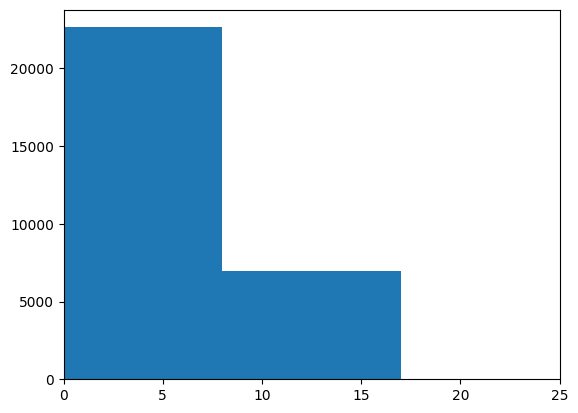

In [1313]:
plt.hist(test_important['Num_Bank_Accounts'], bins=200)
plt.xlim(0,25)
plt.show

In [1314]:
print(test_important['Num_Bank_Accounts'].gt(20).value_counts())

print(test_important['Num_Bank_Accounts'].gt(10).value_counts())

print(test_important['Num_Bank_Accounts'].gt(9).value_counts())

Num_Bank_Accounts
False    29610
True       390
Name: count, dtype: int64
Num_Bank_Accounts
False    29604
True       396
Name: count, dtype: int64
Num_Bank_Accounts
False    28058
True      1942
Name: count, dtype: int64


In [1315]:
# more than 25 accounts and negative amount of account replaced with median
num_bank_accounts_median = test_important['Num_Bank_Accounts'].median()
test_important['Num_Bank_Accounts_reasonable'] = test_important['Num_Bank_Accounts'].copy()
test_important.loc[(test_important['Num_Bank_Accounts_reasonable'] > 25) | (test_important['Num_Bank_Accounts_reasonable'] < 0), 'Num_Bank_Accounts_reasonable'] = num_bank_accounts_median

print(test_important['Num_Bank_Accounts_reasonable'].value_counts())
print(len(test_important['Num_Bank_Accounts_reasonable'].value_counts()))

Num_Bank_Accounts_reasonable
6     4303
7     3904
8     3786
4     3662
3     3638
5     3563
9     1633
10    1546
1     1342
0     1324
2     1293
11       6
Name: count, dtype: int64
12


### Num_Credit_Card

In [1316]:
print(test_important['Num_Credit_Card'].describe())
print( test_important['Num_Credit_Card'].isnull().sum())

# unique values of Num_Credit_Card
print(test_important['Num_Credit_Card'].value_counts())
print(len(test_important['Num_Credit_Card'].value_counts()))


count    30000.000000
mean        22.855700
std        129.142995
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64
0
Num_Credit_Card
5       5566
6       4961
7       4948
4       4235
3       3976
        ... 
444        1
541        1
591        1
392        1
1484       1
Name: count, Length: 574, dtype: int64
574


<function matplotlib.pyplot.show(close=None, block=None)>

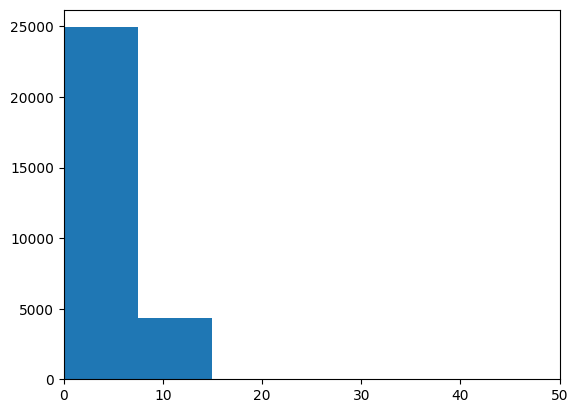

In [1317]:
plt.hist(test_important['Num_Credit_Card'], bins=200)
plt.xlim(0,50)
plt.show

In [1318]:
print(test_important['Num_Credit_Card'].gt(9).value_counts())

print(test_important['Num_Credit_Card'].gt(15).value_counts())

print(test_important['Num_Credit_Card'].gt(10).value_counts())

Num_Credit_Card
False    27819
True      2181
Name: count, dtype: int64
Num_Credit_Card
False    29283
True       717
Name: count, dtype: int64
Num_Credit_Card
False    29274
True       726
Name: count, dtype: int64


In [1319]:
# more than 10 accounts and less than 1 amount of account replaced with median
num_credit_card_median = test_important['Num_Credit_Card'].median()
test_important['Num_Credit_Card_reasonable'] = test_important['Num_Credit_Card'].copy()
test_important.loc[(test_important['Num_Credit_Card_reasonable'] > 10) | (test_important['Num_Credit_Card_reasonable'] < 0), 'Num_Credit_Card_reasonable'] = num_credit_card_median

print(test_important['Num_Credit_Card_reasonable'].value_counts())
print(len(test_important['Num_Credit_Card_reasonable'].value_counts()))

Num_Credit_Card_reasonable
5     6292
6     4961
7     4948
4     4235
3     3976
8     1480
10    1455
9     1403
2      625
1      623
0        2
Name: count, dtype: int64
11


### Interest_Rate

In [1320]:
print(test_important['Interest_Rate'].describe())
print( test_important['Interest_Rate'].isnull().sum())

# unique values of Interest_Rate
print(test_important['Interest_Rate'].value_counts())
print(len(test_important['Interest_Rate'].value_counts()))


count    30000.000000
mean        75.234300
std        474.425269
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5789.000000
Name: Interest_Rate, dtype: float64
0
Interest_Rate
8       1493
5       1491
10      1393
12      1392
6       1388
        ... 
3315       1
3034       1
2338       1
1192       1
3130       1
Name: count, Length: 635, dtype: int64
635


<function matplotlib.pyplot.show(close=None, block=None)>

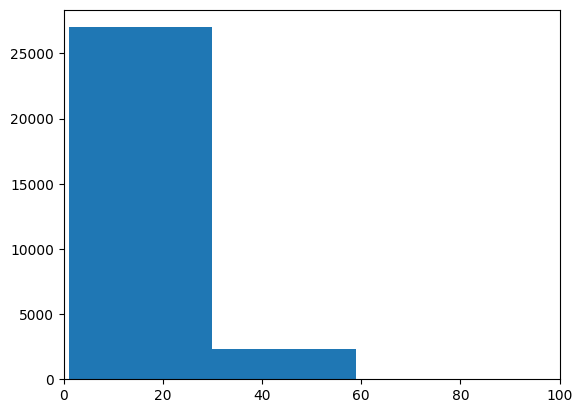

In [1321]:
plt.hist(test_important['Interest_Rate'], bins=200)
plt.xlim(0,100)
plt.show

In [1322]:
print(test_important['Interest_Rate'].gt(35).value_counts())

print(test_important['Interest_Rate'].gt(33).value_counts())

print(test_important['Interest_Rate'].gt(34).value_counts())

Interest_Rate
False    29356
True       644
Name: count, dtype: int64
Interest_Rate
False    28901
True      1099
Name: count, dtype: int64
Interest_Rate
False    29356
True       644
Name: count, dtype: int64


In [1323]:
# more than 34 accounts and less than 0 amount of account replaced with median
interest_rate_median = test_important['Interest_Rate'].median()
test_important['Interest_Rate_reasonable'] = test_important['Interest_Rate'].copy()
test_important.loc[(test_important['Interest_Rate_reasonable'] > 34) | (test_important['Interest_Rate_reasonable'] < 0), 'Interest_Rate_reasonable'] = interest_rate_median

print(test_important['Interest_Rate_reasonable'].value_counts())
print(len(test_important['Interest_Rate_reasonable'].value_counts()))

print(test_important['Interest_Rate_reasonable'].describe())

Interest_Rate_reasonable
8     1493
5     1491
10    1393
12    1392
6     1388
11    1355
13    1354
9     1353
7     1338
18    1249
15    1196
17    1183
19    1135
20    1124
16    1071
3      848
1      788
4      759
2      755
14     683
32     533
23     510
24     500
29     495
28     492
22     483
30     471
27     470
33     463
25     463
34     455
21     450
26     439
31     428
Name: count, dtype: int64
34
count    30000.000000
mean        14.479467
std          8.640066
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate_reasonable, dtype: float64


### Num_of_Loan

In [1324]:
print(test_important['Num_of_Loan'].describe())
print( test_important['Num_of_Loan'].isnull().sum())

count     30000
unique      139
top           3
freq       4333
Name: Num_of_Loan, dtype: object
0


In [1325]:
# removeing _
test_important['Num_of_Loan_clean'] = test_important['Num_of_Loan'].apply(lambda x: str(x).rstrip('_'))

In [1326]:
print(test_important['Num_of_Loan_clean'].describe())
print( test_important['Num_of_Loan_clean'].isnull().sum())

count     30000
unique      128
top           3
freq       4549
Name: Num_of_Loan_clean, dtype: object
0


In [1327]:
test_important['Num_of_Loan_clean_wo_na'] = test_important['Num_of_Loan_clean'].str.replace(r'nan', r'0')

In [1328]:
# Convert the 'Num_of_Loan_clean' column to integer type
test_important['Num_of_Loan_clean_wo_na_int'] = test_important['Num_of_Loan_clean_wo_na'].astype(int)

In [1329]:
print(test_important['Num_of_Loan_clean_wo_na_int'].describe())
print( test_important['Num_of_Loan_clean_wo_na_int'].isnull().sum())


count    30000.000000
mean         2.683633
std         59.397250
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan_clean_wo_na_int, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

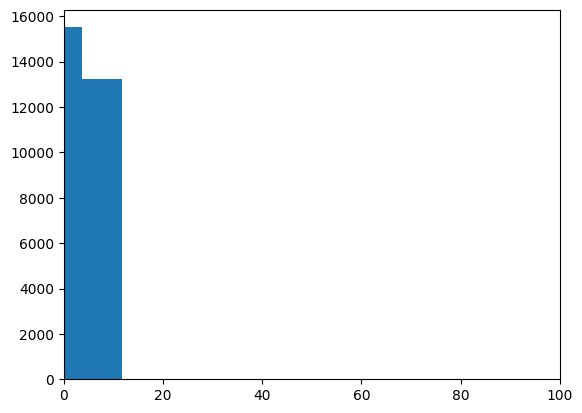

In [1330]:
plt.hist(test_important['Num_of_Loan_clean_wo_na_int'], bins=200)
plt.xlim(0,100)
plt.show

In [1331]:
print(test_important['Num_of_Loan_clean_wo_na_int'].gt(20).value_counts())

print(test_important['Num_of_Loan_clean_wo_na_int'].gt(8).value_counts())

print(test_important['Num_of_Loan_clean_wo_na_int'].gt(11).value_counts())

Num_of_Loan_clean_wo_na_int
False    29879
True       121
Name: count, dtype: int64
Num_of_Loan_clean_wo_na_int
False    28782
True      1218
Name: count, dtype: int64
Num_of_Loan_clean_wo_na_int
False    29878
True       122
Name: count, dtype: int64


In [1332]:
num_of_loan_clean_wo_na_int_reasonable_median = test_important['Num_of_Loan_clean_wo_na_int'].median()
test_important['Num_of_Loan_clean_wo_na_int_reasonable'] = test_important['Num_of_Loan_clean_wo_na_int'].copy()
test_important.loc[(test_important['Num_of_Loan_clean_wo_na_int_reasonable'] > 15) | (test_important['Num_of_Loan_clean_wo_na_int_reasonable'] < 0), 'Num_of_Loan_clean_wo_na_int_reasonable'] = num_of_loan_clean_wo_na_int_reasonable_median

print(test_important['Num_of_Loan_clean_wo_na_int_reasonable'].value_counts())
print(len(test_important['Num_of_Loan_clean_wo_na_int_reasonable'].value_counts()))

print(test_important['Num_of_Loan_clean_wo_na_int_reasonable'].describe())

Num_of_Loan_clean_wo_na_int_reasonable
3    5799
2    4493
4    4469
0    3266
1    3207
6    2326
5    2213
7    2184
9    1096
8     947
Name: count, dtype: int64
10
count    30000.000000
mean         3.507167
std          2.389799
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan_clean_wo_na_int_reasonable, dtype: float64


### Delay_from_due_date


In [1333]:
print(test_important['Delay_from_due_date'].describe())
print( test_important['Delay_from_due_date'].isnull().sum())

# unique values of Delay_from_due_date
print(test_important['Delay_from_due_date'].value_counts())
print(len(test_important['Delay_from_due_date'].value_counts()))


count    30000.000000
mean        21.048433
std         14.921869
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
0
Delay_from_due_date
 15    1086
 13    1038
 9     1027
 14    1009
 8     1006
       ... 
-4       17
 63      15
-5       11
 66      10
 67       9
Name: count, Length: 73, dtype: int64
73


In [1334]:
# more than 40 accounts and less than 0 amount of account replaced with quantile25
delay_from_due_date_quantile25 = test_important['Delay_from_due_date'].quantile(0.25)
test_important['Delay_from_due_date_reasonable'] = test_important['Delay_from_due_date'].copy()
test_important.loc[(test_important['Delay_from_due_date_reasonable'] < 0), 'Delay_from_due_date_reasonable'] = delay_from_due_date_quantile25

print(test_important['Delay_from_due_date_reasonable'].value_counts())
print(len(test_important['Delay_from_due_date_reasonable'].value_counts()))

print(test_important['Delay_from_due_date_reasonable'].describe())

Delay_from_due_date_reasonable
10    1161
15    1086
13    1038
9     1027
14    1009
      ... 
65      24
64      21
63      15
66      10
67       9
Name: count, Length: 68, dtype: int64
68
count    30000.000000
mean        21.116433
std         14.843035
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date_reasonable, dtype: float64


### Num_of_Delayed_Payment

In [1335]:
print(test_important['Num_of_Delayed_Payment'].describe())
print( test_important['Num_of_Delayed_Payment'].isnull().sum())

count     27855
unique      272
top          19
freq       1619
Name: Num_of_Delayed_Payment, dtype: object
2145


In [1336]:
# Nan to 0
test_important['Num_of_Delayed_Payment_wo_na'] = test_important['Num_of_Delayed_Payment'].fillna(0)

In [1337]:
# removeing _
test_important['Num_of_Delayed_Payment_wo_na_clean'] = test_important['Num_of_Delayed_Payment_wo_na'].apply(lambda x: str(x).rstrip('_'))

In [1338]:
test_important['Num_of_Delayed_Payment_wo_na_clean'][:10]

29191     8
68811     9
78626     0
30672    14
81438    13
19000    15
78964     6
40491     8
11284     8
7684     17
Name: Num_of_Delayed_Payment_wo_na_clean, dtype: object

In [1339]:
# Convert the 'Num_of_Delayed_Payment_wo_na_clean' column to integer type
test_important['Num_of_Delayed_Payment_wo_na_clean_int'] = test_important['Num_of_Delayed_Payment_wo_na_clean'].astype(int)

In [1340]:
print(test_important['Num_of_Delayed_Payment_wo_na_clean_int'].describe())
print( test_important['Num_of_Delayed_Payment_wo_na_clean_int'].isnull().sum())

count    30000.000000
mean        26.629467
std        197.701420
min         -3.000000
25%          8.000000
50%         13.000000
75%         18.000000
max       4384.000000
Name: Num_of_Delayed_Payment_wo_na_clean_int, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

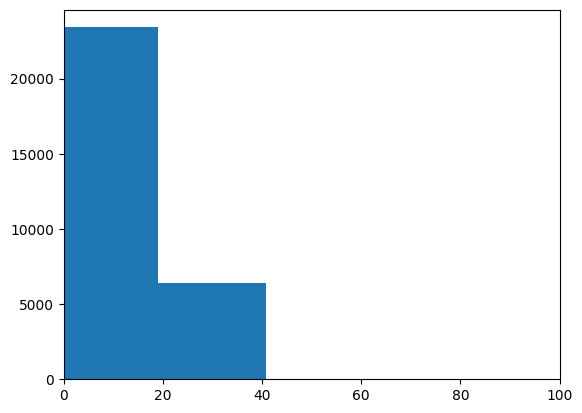

In [1341]:
plt.hist(test_important['Num_of_Delayed_Payment_wo_na_clean_int'], bins=200)
plt.xlim(0,100)
plt.show

In [1342]:
print(test_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(35).value_counts())

print(test_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(8).value_counts())

print(test_important['Num_of_Delayed_Payment_wo_na_clean_int'].gt(13).value_counts())

Num_of_Delayed_Payment_wo_na_clean_int
False    29790
True       210
Name: count, dtype: int64
Num_of_Delayed_Payment_wo_na_clean_int
True     21508
False     8492
Name: count, dtype: int64
Num_of_Delayed_Payment_wo_na_clean_int
False    15665
True     14335
Name: count, dtype: int64


In [1343]:
# more than 40  and less than 0 amount replaced with median
num_of_delayed_payment_wo_na_clean_int_median = test_important['Num_of_Delayed_Payment_wo_na_clean_int'].median()
test_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] = test_important['Num_of_Delayed_Payment_wo_na_clean_int'].copy()
test_important.loc[(test_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] > 40) | (test_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] < 0), 'Num_of_Delayed_Payment_wo_na_clean_int_reasonable'] = num_of_delayed_payment_wo_na_clean_int_median

print(len(test_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'].value_counts()))

print(test_important['Num_of_Delayed_Payment_wo_na_clean_int_reasonable'].describe())

29
count    30000.000000
mean        12.428700
std          6.845642
min          0.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment_wo_na_clean_int_reasonable, dtype: float64


### Changed_Credit_Limit

In [1344]:
# _ to 0
test_important['Changed_Credit_Limit_wo_na'] = test_important['Changed_Credit_Limit'].str.replace(r'_', r'0')

In [1345]:
print(test_important['Changed_Credit_Limit_wo_na'].describe())
print( test_important['Changed_Credit_Limit_wo_na'].isnull().sum())

count     30000
unique     3544
top           0
freq        607
Name: Changed_Credit_Limit_wo_na, dtype: object
0


In [1346]:
# Convert the 'Changed_Credit_Limit_wo_na' column to float type
test_important['Changed_Credit_Limit_wo_na_float'] = test_important['Changed_Credit_Limit_wo_na'].astype(float)

In [1347]:
print(test_important['Changed_Credit_Limit_wo_na_float'].describe())
print( test_important['Changed_Credit_Limit_wo_na_float'].isnull().sum())

count    30000.000000
mean        10.161318
std          6.878138
min         -6.480000
25%          4.960000
50%          9.250000
75%         14.650000
max         36.490000
Name: Changed_Credit_Limit_wo_na_float, dtype: float64
0


In [1348]:
# negative percentage to positive
test_important['Changed_Credit_Limit_wo_na_float_pos'] = test_important['Changed_Credit_Limit_wo_na_float'].abs()

In [1349]:
print(test_important['Changed_Credit_Limit_wo_na_float_pos'].describe())
print( test_important['Changed_Credit_Limit_wo_na_float_pos'].isnull().sum())

count    30000.000000
mean        10.238605
std          6.762550
min          0.000000
25%          4.980000
50%          9.250000
75%         14.650000
max         36.490000
Name: Changed_Credit_Limit_wo_na_float_pos, dtype: float64
0


### Num_Credit_Inquiries

In [1350]:
print(test_important['Num_Credit_Inquiries'].describe())
print( test_important['Num_Credit_Inquiries'].isnull().sum())

count    29379.000000
mean        26.429559
std        188.895911
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2580.000000
Name: Num_Credit_Inquiries, dtype: float64
621


In [1351]:
test_important['Num_Credit_Inquiries_wo_na'] = test_important['Num_Credit_Inquiries'].fillna(test_important['Num_Credit_Inquiries'].median())

In [1352]:
print(test_important['Num_Credit_Inquiries_wo_na'].describe())
print( test_important['Num_Credit_Inquiries_wo_na'].isnull().sum())

count    30000.000000
mean        26.006667
std        186.953179
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2580.000000
Name: Num_Credit_Inquiries_wo_na, dtype: float64
0


<function matplotlib.pyplot.show(close=None, block=None)>

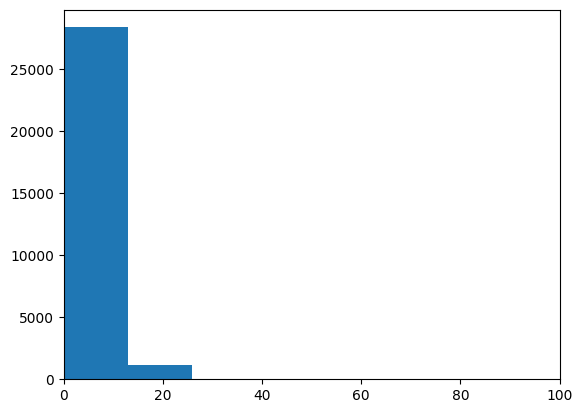

In [1353]:
plt.hist(test_important['Num_Credit_Inquiries_wo_na'], bins=200)
plt.xlim(0,100)
plt.show

In [1354]:
print(test_important['Num_Credit_Inquiries_wo_na'].gt(30).value_counts())

print(test_important['Num_Credit_Inquiries_wo_na'].gt(20).value_counts())

print(test_important['Num_Credit_Inquiries_wo_na'].gt(15).value_counts())

Num_Credit_Inquiries_wo_na
False    29544
True       456
Name: count, dtype: int64
Num_Credit_Inquiries_wo_na
False    29544
True       456
Name: count, dtype: int64
Num_Credit_Inquiries_wo_na
False    29340
True       660
Name: count, dtype: int64


In [1355]:
# more than 30 replaced with median
num_credit_inquiries_wo_na_median = test_important['Num_Credit_Inquiries_wo_na'].median()
test_important['Num_Credit_Inquiries_wo_na_reasonable'] = test_important['Num_Credit_Inquiries_wo_na'].copy()
test_important.loc[(test_important['Num_Credit_Inquiries_wo_na_reasonable'] > 30), 'Num_Credit_Inquiries_wo_na_reasonable'] = num_credit_inquiries_wo_na_median

print(len(test_important['Num_Credit_Inquiries_wo_na_reasonable'].value_counts()))

print(test_important['Num_Credit_Inquiries_wo_na_reasonable'].describe())

18
count    30000.000000
mean         5.767533
std          3.775902
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries_wo_na_reasonable, dtype: float64


### Credit_Mix

In [1356]:
# unique values of credit_mix
credit_mix_counts = test_important['Credit_Mix'].value_counts()
print(credit_mix_counts)


Credit_Mix
Standard    10895
Good         7368
_            6063
Bad          5674
Name: count, dtype: int64


In [1357]:
# every "_" change to unknown
test_important['Credit_Mix_plus_unknown'] = test_important['Credit_Mix'].replace('_', 'Unknown')

credit_mix_counts = test_important['Credit_Mix_plus_unknown'].value_counts()
print(credit_mix_counts)


Credit_Mix_plus_unknown
Standard    10895
Good         7368
Unknown      6063
Bad          5674
Name: count, dtype: int64


### Outstanding_Debt
     

In [1358]:
print(test_important['Outstanding_Debt'].describe())
print( test_important['Outstanding_Debt'].isnull().sum())

count       30000
unique      11845
top       2089.58
freq           10
Name: Outstanding_Debt, dtype: object
0


In [1359]:
test_important['Outstanding_Debt_clean'] = test_important['Outstanding_Debt'].apply(lambda x: str(x).rstrip('_'))

In [1360]:
# Convert the 'Outstanding_Debt_clean' column to float type
test_important['Outstanding_Debt_clean_float'] = test_important['Outstanding_Debt_clean'].astype(float)

In [1361]:
print(test_important['Outstanding_Debt_clean_float'].describe())
print( test_important['Outstanding_Debt_clean_float'].isnull().sum())

count    30000.000000
mean      1424.968732
std       1146.830539
min          0.340000
25%        573.520000
50%       1170.580000
75%       1948.980000
max       4998.070000
Name: Outstanding_Debt_clean_float, dtype: float64
0


### Credit_Utilization_Ratio
no transformation needed

In [1362]:
print(test_important['Credit_Utilization_Ratio'].describe())
print( test_important['Credit_Utilization_Ratio'].isnull().sum())

count    30000.000000
mean        32.347764
std          5.116871
min         20.880082
25%         28.093013
50%         32.383490
75%         36.582838
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64
0


### Credit_History_Age

In [1363]:
# Extract months using regex

# Extract years
test_important['Credit_History_Age_years'] = test_important['Credit_History_Age'].str.extract(r'(\d+) Years').astype(float)

# Extract months and convert to numeric
test_important['Credit_History_Age_months'] = test_important['Credit_History_Age'].str.extract(r'(\d+) Months').astype(float)

# Calculate total months
test_important['Total_Credit_History_months'] = test_important['Credit_History_Age_years'].astype(float) * 12 + test_important['Credit_History_Age_months']

print(test_important['Total_Credit_History_months'].head())


29191    196.0
68811    390.0
78626    339.0
30672    134.0
81438    357.0
Name: Total_Credit_History_months, dtype: float64


In [1364]:
print(test_important['Total_Credit_History_months'].describe())
print( test_important['Total_Credit_History_months'].isnull().sum())

count    27320.000000
mean       221.544949
std        100.025170
min          2.000000
25%        145.000000
50%        220.000000
75%        302.000000
max        404.000000
Name: Total_Credit_History_months, dtype: float64
2680


In [1365]:
total_credit_history_number_median = test_important['Total_Credit_History_months'].median()
test_important['Total_Credit_History_months_wo_na'] = test_important['Total_Credit_History_months'].fillna(total_credit_history_number_median)

In [1366]:
print(test_important['Total_Credit_History_months_wo_na'].describe())
print( test_important['Total_Credit_History_months_wo_na'].isnull().sum())

count    30000.000000
mean       221.406933
std         95.453737
min          2.000000
25%        154.000000
50%        220.000000
75%        292.000000
max        404.000000
Name: Total_Credit_History_months_wo_na, dtype: float64
0


### Payment_of_Min_Amount
no transformation needed

In [1367]:
# unique values of Payment_of_Min_Amount
test_important['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    15692
No     10748
NM      3560
Name: count, dtype: int64

### Total_EMI_per_month
no transformation needed

In [1368]:
print(test_important['Total_EMI_per_month'].describe())
print( test_important['Total_EMI_per_month'].isnull().sum())

count    30000.000000
mean      1360.645061
std       8222.550138
min          0.000000
25%         30.359208
50%         69.733999
75%        162.375374
max      82204.000000
Name: Total_EMI_per_month, dtype: float64
0


### Amount_invested_monthly

In [1369]:
print(test_important['Amount_invested_monthly'].describe())
print( test_important['Amount_invested_monthly'].isnull().sum())

count         28648
unique        27351
top       __10000__
freq           1257
Name: Amount_invested_monthly, dtype: object
1352


In [1370]:
test_important['Amount_invested_monthly_clean'] = test_important['Amount_invested_monthly'].astype(str).apply(lambda x:  re.sub(r'^_+|_+$', '', x))


In [1371]:
test_important['Amount_invested_monthly_clean_float'] = test_important['Amount_invested_monthly_clean'].astype(float)


In [1372]:
amount_invested_monthly_clean_float_median = test_important['Amount_invested_monthly_clean_float'].median()
test_important['Amount_invested_monthly_clean_float_wo_na'] = test_important['Amount_invested_monthly_clean_float'].fillna(amount_invested_monthly_clean_float_median)

In [1373]:
print(test_important['Amount_invested_monthly_clean_float_wo_na'].describe())
print( test_important['Amount_invested_monthly_clean_float_wo_na'].isnull().sum())

count    30000.000000
mean       603.766658
std       1974.269519
min          0.000000
25%         77.364140
50%        135.892508
75%        255.995860
max      10000.000000
Name: Amount_invested_monthly_clean_float_wo_na, dtype: float64
0


### Payment_Behaviour

In [1374]:
test_important['Payment_Behaviour'].value_counts()


Payment_Behaviour
Low_spent_Small_value_payments      7651
High_spent_Medium_value_payments    5235
Low_spent_Medium_value_payments     4168
High_spent_Large_value_payments     4165
High_spent_Small_value_payments     3408
Low_spent_Large_value_payments      3106
!@9#%8                              2267
Name: count, dtype: int64

In [1375]:
test_important['Payment_Behaviour_plus_unknown'] = test_important['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

test_important['Payment_Behaviour_plus_unknown'].value_counts()


Payment_Behaviour_plus_unknown
Low_spent_Small_value_payments      7651
High_spent_Medium_value_payments    5235
Low_spent_Medium_value_payments     4168
High_spent_Large_value_payments     4165
High_spent_Small_value_payments     3408
Low_spent_Large_value_payments      3106
Unknown                             2267
Name: count, dtype: int64

### Monthly_Balance

In [1376]:
print(test_important['Monthly_Balance'].describe())
print( test_important['Monthly_Balance'].isnull().sum())

count                                29636
unique                               29634
top       __-333333333333333333333333333__
freq                                     3
Name: Monthly_Balance, dtype: object
364


In [1377]:
print(((test_important['Monthly_Balance']).value_counts()>1).sum())

1


In [1378]:
duplicate_values = test_important['Monthly_Balance'].value_counts()
duplicates_mask = test_important['Monthly_Balance'].isin(duplicate_values[duplicate_values > 1].index)
duplicate_rows = test_important[duplicates_mask]
print(duplicate_rows['Monthly_Balance'])

60009    __-333333333333333333333333333__
5545     __-333333333333333333333333333__
82918    __-333333333333333333333333333__
Name: Monthly_Balance, dtype: object


In [1379]:
print((test_important['Monthly_Balance'] == "__-333333333333333333333333333__").sum())

3


In [1380]:
test_important['Monthly_Balance_numbers'] = test_important['Monthly_Balance'].replace('__-333333333333333333333333333__', '-1')

In [1381]:
test_important['Monthly_Balance_numbers_float'] = test_important['Monthly_Balance_numbers'].astype(float)

In [1382]:
print(test_important['Monthly_Balance_numbers_float'].describe())
print( test_important['Monthly_Balance_numbers_float'].isnull().sum())

count    29636.000000
mean       403.357871
std        214.729770
min         -1.000000
25%        269.454146
50%        337.398846
75%        471.919349
max       1576.288935
Name: Monthly_Balance_numbers_float, dtype: float64
364


In [1383]:
test_important['Monthly_Balance_numbers_float_wo_na'] = test_important['Monthly_Balance_numbers_float'].fillna(0)

In [1384]:
print(test_important['Monthly_Balance_numbers_float_wo_na'].describe())
print( test_important['Monthly_Balance_numbers_float_wo_na'].isnull().sum())

count    30000.000000
mean       398.463795
std        217.943979
min         -1.000000
25%        267.256335
50%        335.534137
75%        469.267473
max       1576.288935
Name: Monthly_Balance_numbers_float_wo_na, dtype: float64
0


In [1385]:
monthly_balance_numbers_float_wo_na_median = test_important['Monthly_Balance_numbers_float_wo_na'].median()
test_important['Monthly_Balance_numbers_float_wo_na_reasonable'] = test_important['Monthly_Balance_numbers_float_wo_na'].copy()
test_important.loc[(test_important['Monthly_Balance_numbers_float_wo_na_reasonable'] < 0), 'Monthly_Balance_numbers_float_wo_na'] = monthly_balance_numbers_float_wo_na_median


print(test_important['Monthly_Balance_numbers_float_wo_na_reasonable'].describe())
print( test_important['Monthly_Balance_numbers_float_wo_na_reasonable'].isnull().sum())

count    30000.000000
mean       398.463795
std        217.943979
min         -1.000000
25%        267.256335
50%        335.534137
75%        469.267473
max       1576.288935
Name: Monthly_Balance_numbers_float_wo_na_reasonable, dtype: float64
0


### Occupation

In [1386]:
occupation_counts = test_important['Occupation'].value_counts()
print(occupation_counts)

Occupation
_______          2087
Lawyer           1986
Engineer         1942
Entrepreneur     1928
Developer        1926
Accountant       1916
Scientist        1892
Media_Manager    1886
Architect        1871
Mechanic         1849
Teacher          1847
Doctor           1825
Writer           1770
Journalist       1765
Musician         1765
Manager          1745
Name: count, dtype: int64


In [1387]:
test_important['Occupation_plus_unknown'] = test_important['Occupation'].replace('_______', 'Unknown')

test_important['Occupation_plus_unknown'].value_counts()

Occupation_plus_unknown
Unknown          2087
Lawyer           1986
Engineer         1942
Entrepreneur     1928
Developer        1926
Accountant       1916
Scientist        1892
Media_Manager    1886
Architect        1871
Mechanic         1849
Teacher          1847
Doctor           1825
Writer           1770
Journalist       1765
Musician         1765
Manager          1745
Name: count, dtype: int64

###  Credit_Score
no transformation needed

In [1388]:
credit_score_counts = test_important['Credit_Score'].value_counts()
print(credit_score_counts)

Credit_Score
Standard    15952
Poor         8699
Good         5349
Name: count, dtype: int64


### deleting old columns - TEST

In [1389]:
#remove old age
test_important.drop(columns=['Age'], inplace=True)
test_important.drop(columns=['Age_clean'], inplace=True)
test_important.drop(columns=['Age_clean_int'], inplace=True)
#test_important.drop(columns=['Age_clean_int_replased'], inplace=True)

test_important.drop(columns=['Age_replaced_na'], inplace=True)
test_important.drop(columns=['Age_replaced_na_wo_na'], inplace=True)
test_important.drop(columns=['Age_replaced_na_wo_na_clean'], inplace=True)
test_important.drop(columns=['Age_replaced_na_wo_na_clean_int'], inplace=True)



In [1390]:
#remove old anual_income
test_important.drop(columns=['Annual_Income'], inplace=True)
test_important.drop(columns=['Annual_Income_clean'], inplace=True)
test_important.drop(columns=['Annual_Income_clean_float'], inplace=True)

In [1391]:
#remove old Monthly_Inhand_Salary
test_important.drop(columns=['Monthly_Inhand_Salary'], inplace=True)
test_important.drop(columns=['Monthly_Inhand_Salary_wo_na'], inplace=True)

In [1392]:
#remove old Num_Bank_Accounts
test_important.drop(columns=['Num_Bank_Accounts'], inplace=True)

In [1393]:
#remove old Num_Credit_Card
test_important.drop(columns=['Num_Credit_Card'], inplace=True)

In [1394]:
#remove old Interest_Rate
test_important.drop(columns=['Interest_Rate'], inplace=True)

In [1395]:
#remove old Num_of_Loan
test_important.drop(columns=['Num_of_Loan'], inplace=True)
test_important.drop(columns=['Num_of_Loan_clean'], inplace=True)
test_important.drop(columns=['Num_of_Loan_clean_wo_na'], inplace=True)
test_important.drop(columns=['Num_of_Loan_clean_wo_na_int'], inplace=True)


In [1396]:
#remove old Delay_from_due_date
test_important.drop(columns=['Delay_from_due_date'], inplace=True)

In [1397]:
#remove old Num_of_Delayed_Payment
test_important.drop(columns=['Num_of_Delayed_Payment'], inplace=True)
test_important.drop(columns=['Num_of_Delayed_Payment_wo_na'], inplace=True)
test_important.drop(columns=['Num_of_Delayed_Payment_wo_na_clean'], inplace=True)
test_important.drop(columns=['Num_of_Delayed_Payment_wo_na_clean_int'], inplace=True)

In [1398]:
#remove old Changed_Credit_Limit
test_important.drop(columns=['Changed_Credit_Limit'], inplace=True)
test_important.drop(columns=['Changed_Credit_Limit_wo_na'], inplace=True)
test_important.drop(columns=['Changed_Credit_Limit_wo_na_float'], inplace=True)

In [1399]:
#remove old Num_Credit_Inquiries
test_important.drop(columns=['Num_Credit_Inquiries'], inplace=True)
test_important.drop(columns=['Num_Credit_Inquiries_wo_na'], inplace=True)

In [1400]:
#remove old Credit_Mix
test_important.drop(columns=['Credit_Mix'], inplace=True)


In [1401]:
#remove old Outstanding_Debt
test_important.drop(columns=['Outstanding_Debt'], inplace=True)
test_important.drop(columns=['Outstanding_Debt_clean'], inplace=True)

In [1402]:
#remove old Credit_History_Age
test_important.drop(columns=['Credit_History_Age'], inplace=True)
test_important.drop(columns=['Credit_History_Age_years'], inplace=True)
test_important.drop(columns=['Credit_History_Age_months'], inplace=True)
test_important.drop(columns=['Total_Credit_History_months'], inplace=True)

In [1403]:
#remove old Amount_invested_monthly
test_important.drop(columns=['Amount_invested_monthly'], inplace=True)
test_important.drop(columns=['Amount_invested_monthly_clean'], inplace=True)
test_important.drop(columns=['Amount_invested_monthly_clean_float'], inplace=True)

In [1404]:
#remove old Payment_Behaviour
test_important.drop(columns=['Payment_Behaviour'], inplace=True)

In [1405]:
#remove old Monthly_Balance
test_important.drop(columns=['Monthly_Balance'], inplace=True)
test_important.drop(columns=['Monthly_Balance_numbers'], inplace=True)
test_important.drop(columns=['Monthly_Balance_numbers_float'], inplace=True)
test_important.drop(columns=['Monthly_Balance_numbers_float_wo_na'], inplace=True)

In [1406]:
#remove old Occupation
test_important.drop(columns=['Occupation'], inplace=True)

## final_columns - TRAIN


In [1407]:
train_important.dtypes

Credit_Utilization_Ratio                             float64
Payment_of_Min_Amount                                 object
Total_EMI_per_month                                  float64
Credit_Score                                          object
Age_replaced_na_wo_na_clean_int_reasonable             int64
Annual_Income_clean_float_round                      float64
Monthly_Inhand_Salary_wo_na_round                    float64
Num_Bank_Accounts_reasonable                           int64
Num_Credit_Card_reasonable                             int64
Interest_Rate_reasonable                               int64
Num_of_Loan_clean_wo_na_int_reasonable                 int64
Delay_from_due_date_reasonable                         int64
Num_of_Delayed_Payment_wo_na_clean_int_reasonable      int64
Changed_Credit_Limit_wo_na_float_pos                 float64
Num_Credit_Inquiries_wo_na_reasonable                float64
Credit_Mix_plus_unknown                               object
Outstanding_Debt_clean_f

In [1408]:
final_columns = train_important.columns.tolist()
print(final_columns)
categorical_columns = ['Credit_Mix_plus_unknown',
                       'Payment_of_Min_Amount',
                       'Occupation_plus_unknown',
                       'Payment_Behaviour_plus_unknown'
                       ]

['Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score', 'Age_replaced_na_wo_na_clean_int_reasonable', 'Annual_Income_clean_float_round', 'Monthly_Inhand_Salary_wo_na_round', 'Num_Bank_Accounts_reasonable', 'Num_Credit_Card_reasonable', 'Interest_Rate_reasonable', 'Num_of_Loan_clean_wo_na_int_reasonable', 'Delay_from_due_date_reasonable', 'Num_of_Delayed_Payment_wo_na_clean_int_reasonable', 'Changed_Credit_Limit_wo_na_float_pos', 'Num_Credit_Inquiries_wo_na_reasonable', 'Credit_Mix_plus_unknown', 'Outstanding_Debt_clean_float', 'Total_Credit_History_months_wo_na', 'Amount_invested_monthly_clean_float_wo_na', 'Payment_Behaviour_plus_unknown', 'Monthly_Balance_numbers_float_wo_na_reasonable', 'Occupation_plus_unknown']


### To dummy

In [1409]:
train_important_dummy = pd.get_dummies(train_important[categorical_columns])


In [1410]:
train_dummy_final_columns = train_important_dummy.columns.tolist()


In [1411]:
y_train = train_important['Credit_Score']


X_train_almost = pd.concat([train_important[final_columns], train_important_dummy], axis=1)
X_train_almost_2 = X_train_almost.drop(columns=categorical_columns)


print(len(X_train_almost_2.columns.tolist()))


48


In [1412]:
X_train = X_train_almost_2.drop(columns=['Credit_Score'])
print(X_train.shape)

(70000, 47)


In [1413]:
print(len(X_train.columns.tolist()))
X_train.dtypes

47


Credit_Utilization_Ratio                                           float64
Total_EMI_per_month                                                float64
Age_replaced_na_wo_na_clean_int_reasonable                           int64
Annual_Income_clean_float_round                                    float64
Monthly_Inhand_Salary_wo_na_round                                  float64
Num_Bank_Accounts_reasonable                                         int64
Num_Credit_Card_reasonable                                           int64
Interest_Rate_reasonable                                             int64
Num_of_Loan_clean_wo_na_int_reasonable                               int64
Delay_from_due_date_reasonable                                       int64
Num_of_Delayed_Payment_wo_na_clean_int_reasonable                    int64
Changed_Credit_Limit_wo_na_float_pos                               float64
Num_Credit_Inquiries_wo_na_reasonable                              float64
Outstanding_Debt_clean_fl

## final_columns - TEST


In [1414]:
final_columns = test_important.columns.tolist()
print(final_columns)
categorical_columns = ['Credit_Mix_plus_unknown',
                       'Payment_of_Min_Amount',
                       'Occupation_plus_unknown',
                       'Payment_Behaviour_plus_unknown'
                       ]

['Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score', 'Age_replaced_na_wo_na_clean_int_reasonable', 'Annual_Income_clean_float_round', 'Monthly_Inhand_Salary_wo_na_round', 'Num_Bank_Accounts_reasonable', 'Num_Credit_Card_reasonable', 'Interest_Rate_reasonable', 'Num_of_Loan_clean_wo_na_int_reasonable', 'Delay_from_due_date_reasonable', 'Num_of_Delayed_Payment_wo_na_clean_int_reasonable', 'Changed_Credit_Limit_wo_na_float_pos', 'Num_Credit_Inquiries_wo_na_reasonable', 'Credit_Mix_plus_unknown', 'Outstanding_Debt_clean_float', 'Total_Credit_History_months_wo_na', 'Amount_invested_monthly_clean_float_wo_na', 'Payment_Behaviour_plus_unknown', 'Monthly_Balance_numbers_float_wo_na_reasonable', 'Occupation_plus_unknown']


### To dummy

In [1415]:
test_important_dummy = pd.get_dummies(test_important[categorical_columns])


In [1416]:
test_dummy_final_columns = test_important_dummy.columns.tolist()
test_dummy_final_columns

['Credit_Mix_plus_unknown_Bad',
 'Credit_Mix_plus_unknown_Good',
 'Credit_Mix_plus_unknown_Standard',
 'Credit_Mix_plus_unknown_Unknown',
 'Payment_of_Min_Amount_NM',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',
 'Occupation_plus_unknown_Accountant',
 'Occupation_plus_unknown_Architect',
 'Occupation_plus_unknown_Developer',
 'Occupation_plus_unknown_Doctor',
 'Occupation_plus_unknown_Engineer',
 'Occupation_plus_unknown_Entrepreneur',
 'Occupation_plus_unknown_Journalist',
 'Occupation_plus_unknown_Lawyer',
 'Occupation_plus_unknown_Manager',
 'Occupation_plus_unknown_Mechanic',
 'Occupation_plus_unknown_Media_Manager',
 'Occupation_plus_unknown_Musician',
 'Occupation_plus_unknown_Scientist',
 'Occupation_plus_unknown_Teacher',
 'Occupation_plus_unknown_Unknown',
 'Occupation_plus_unknown_Writer',
 'Payment_Behaviour_plus_unknown_High_spent_Large_value_payments',
 'Payment_Behaviour_plus_unknown_High_spent_Medium_value_payments',
 'Payment_Behaviour_plus_unknown_High_sp

In [1417]:
y_test = test_important['Credit_Score']

X_test_almost = pd.concat([test_important[final_columns], test_important_dummy], axis=1)
#X_test = X_test_almost.drop(columns=categorical_columns)

X_test_almost_2 = X_test_almost.drop(columns=categorical_columns)

#print(len(X_test.columns.tolist()))


In [1418]:
X_test = X_test_almost_2.drop(columns=['Credit_Score'])
print(len(X_test.columns.tolist()))

47


In [1419]:
X_test.dtypes

Credit_Utilization_Ratio                                           float64
Total_EMI_per_month                                                float64
Age_replaced_na_wo_na_clean_int_reasonable                           int64
Annual_Income_clean_float_round                                    float64
Monthly_Inhand_Salary_wo_na_round                                  float64
Num_Bank_Accounts_reasonable                                         int64
Num_Credit_Card_reasonable                                           int64
Interest_Rate_reasonable                                             int64
Num_of_Loan_clean_wo_na_int_reasonable                               int64
Delay_from_due_date_reasonable                                       int64
Num_of_Delayed_Payment_wo_na_clean_int_reasonable                    int64
Changed_Credit_Limit_wo_na_float_pos                               float64
Num_Credit_Inquiries_wo_na_reasonable                              float64
Outstanding_Debt_clean_fl

# Final data

In [1420]:
X_train

,Credit_Utilization_Ratio,Total_EMI_per_month,Age_replaced_na_wo_na_clean_int_reasonable,Annual_Income_clean_float_round,Monthly_Inhand_Salary_wo_na_round,Num_Bank_Accounts_reasonable,Num_Credit_Card_reasonable,Interest_Rate_reasonable,Num_of_Loan_clean_wo_na_int_reasonable,Delay_from_due_date_reasonable,...,Occupation_plus_unknown_Teacher,Occupation_plus_unknown_Unknown,Occupation_plus_unknown_Writer,Payment_Behaviour_plus_unknown_High_spent_Large_value_payments,Payment_Behaviour_plus_unknown_High_spent_Medium_value_payments,Payment_Behaviour_plus_unknown_High_spent_Small_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Large_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Medium_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Small_value_payments,Payment_Behaviour_plus_unknown_Unknown
55677,29.315405,61867.000000,37,17559.88,1179.32,2,7,5,0,1,...,False,False,False,False,False,False,False,False,True,False
29133,29.924723,39.621967,18,8969.98,3081.90,9,6,22,8,52,...,False,False,False,False,False,False,False,False,True,False
57009,38.482700,37.023498,21,29041.40,2646.12,3,5,3,2,6,...,False,False,False,False,False,False,False,False,True,False
9705,26.557580,287.623792,23,72207.52,5881.29,6,7,21,5,44,...,True,False,False,False,False,False,False,False,True,False
14380,29.609360,223.408201,44,102626.97,8733.25,1,4,2,4,2,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32927,29.042818,42.605317,42,9795.07,586.26,7,8,29,6,62,...,False,False,False,False,False,False,False,False,True,False
78570,29.519974,142.666375,33,98703.99,3081.90,2,6,8,3,10,...,False,False,False,False,True,False,False,False,False,False
67630,25.884169,241.775058,28,44928.27,3700.02,8,8,24,9,34,...,False,False,False,True,False,False,False,False,False,False
79341,25.835415,114.785191,37,29473.28,2163.11,3,3,10,6,7,...,False,True,False,False,False,False,False,False,True,False


In [1421]:
y_train

55677    Standard
29133        Poor
57009        Poor
9705         Poor
14380        Good
           ...   
32927        Poor
78570        Poor
67630        Poor
79341    Standard
86794    Standard
Name: Credit_Score, Length: 70000, dtype: object

In [1422]:
X_test

,Credit_Utilization_Ratio,Total_EMI_per_month,Age_replaced_na_wo_na_clean_int_reasonable,Annual_Income_clean_float_round,Monthly_Inhand_Salary_wo_na_round,Num_Bank_Accounts_reasonable,Num_Credit_Card_reasonable,Interest_Rate_reasonable,Num_of_Loan_clean_wo_na_int_reasonable,Delay_from_due_date_reasonable,...,Occupation_plus_unknown_Teacher,Occupation_plus_unknown_Unknown,Occupation_plus_unknown_Writer,Payment_Behaviour_plus_unknown_High_spent_Large_value_payments,Payment_Behaviour_plus_unknown_High_spent_Medium_value_payments,Payment_Behaviour_plus_unknown_High_spent_Small_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Large_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Medium_value_payments,Payment_Behaviour_plus_unknown_Low_spent_Small_value_payments,Payment_Behaviour_plus_unknown_Unknown
29191,25.064197,45.441543,17,48356.66,4233.72,3,4,16,2,8,...,False,False,False,False,False,False,True,False,False,False
68811,29.694947,113.493214,32,157814.32,13087.19,4,5,6,1,3,...,False,False,False,False,True,False,False,False,False,False
78626,39.337991,193.352961,21,147058.64,12319.89,2,3,11,2,9,...,False,False,False,False,False,True,False,False,False,False
30672,33.915206,174.427356,16,72637.48,6064.12,6,5,27,4,15,...,True,False,False,False,True,False,False,False,False,False
81438,30.552478,7.167791,33,12050.60,1159.22,6,4,20,1,13,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77478,28.382571,15.448183,25,24497.42,3119.70,4,3,14,1,8,...,False,False,False,False,False,False,False,True,False,False
1855,30.667486,224.122139,25,142113.96,11903.83,6,4,17,3,18,...,False,False,False,True,False,False,False,False,False,False
88171,28.153494,326.167190,31,83618.96,6744.25,10,5,29,6,52,...,False,False,False,False,False,False,False,True,False,False
23755,25.787532,249.104133,54,155916.32,3119.70,6,6,2,3,0,...,True,False,False,False,False,False,False,False,True,False


In [1423]:
y_test


29191    Standard
68811        Good
78626        Good
30672        Poor
81438    Standard
           ...   
77478    Standard
1855     Standard
88171        Poor
23755    Standard
4256         Poor
Name: Credit_Score, Length: 30000, dtype: object

# Models

## Decision tree

In [1424]:
decision_tree = DecisionTreeClassifier()
# model_tree = decision_tree.fit(X_train, y_train)

### HyperParameter Tuning

In [1425]:
param_grid = {
    'max_depth': range(1, 11)
}
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# param_dist = {
#     'max_depth': randint(0, 31)  # Define the range of depths to sample from
# }

In [1426]:
grid_search_tree = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
# random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

Model fit takes 30 s

In [1427]:
tree_grid = grid_search_tree.fit(X_train, y_train)
# random_search.fit(X_train, y_train)

In [1428]:
best_params_grid = grid_search_tree.best_params_
print(best_params_grid)
best_score_grid = grid_search_tree.best_score_
print(best_score_grid)
best_tree_model_grid = grid_search_tree.best_estimator_


{'max_depth': 10}
0.7042285714285714


In [1429]:
y_tree_grid = tree_grid.predict(X_test)
print(classification_report(y_test, y_tree_grid))


              precision    recall  f1-score   support

        Good       0.57      0.69      0.62      5349
        Poor       0.73      0.66      0.69      8699
    Standard       0.76      0.74      0.75     15952

    accuracy                           0.71     30000
   macro avg       0.68      0.70      0.69     30000
weighted avg       0.71      0.71      0.71     30000



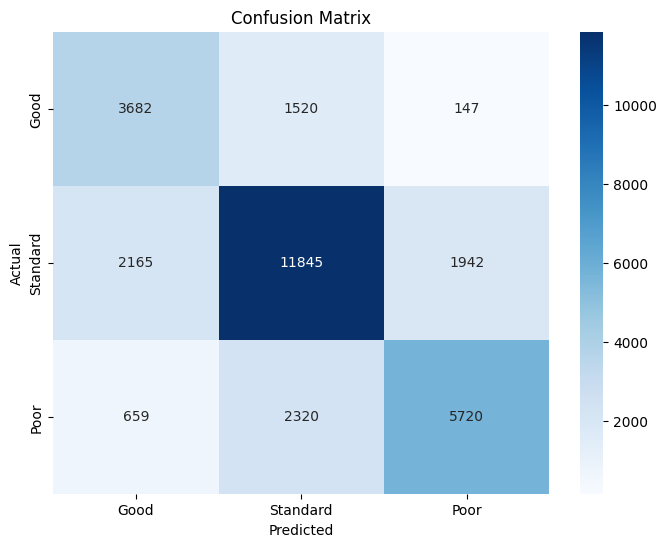

In [1430]:
cm = confusion_matrix(y_test, y_tree_grid, labels = ["Good", "Standard", "Poor"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Standard", "Poor"], yticklabels=["Good", "Standard", "Poor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[Text(0.5, 0.9, 'Outstanding_Debt_clean_float <= 1500.005\ngini = 0.601\nsamples = 70000\nvalue = [12479, 20299, 37222]\nclass = Standard'),
 Text(0.25, 0.7, 'Credit_Mix_plus_unknown_Standard <= 0.5\ngini = 0.549\nsamples = 47761\nvalue = [12153, 6709, 28899]\nclass = Standard'),
 Text(0.125, 0.5, 'Payment_of_Min_Amount_Yes <= 0.5\ngini = 0.627\nsamples = 27685\nvalue = [10772, 4812, 12101]\nclass = Standard'),
 Text(0.0625, 0.3, 'Num_Credit_Card_reasonable <= 2.5\ngini = 0.617\nsamples = 23282\nvalue = [10536, 3610, 9136]\nclass = Good'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Credit_Mix_plus_unknown_Bad <= 0.5\ngini = 0.469\nsamples = 4403\nvalue = [236, 1202, 2965]\nclass = Standard'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Interest_Rate_reasonable <= 20.5\ngini = 0.286\nsamples = 20076\nvalue = [1381, 1897, 16798]\nclass = Standard'),
 Text(0.3125, 0.3, 'Num_Credit_Card_

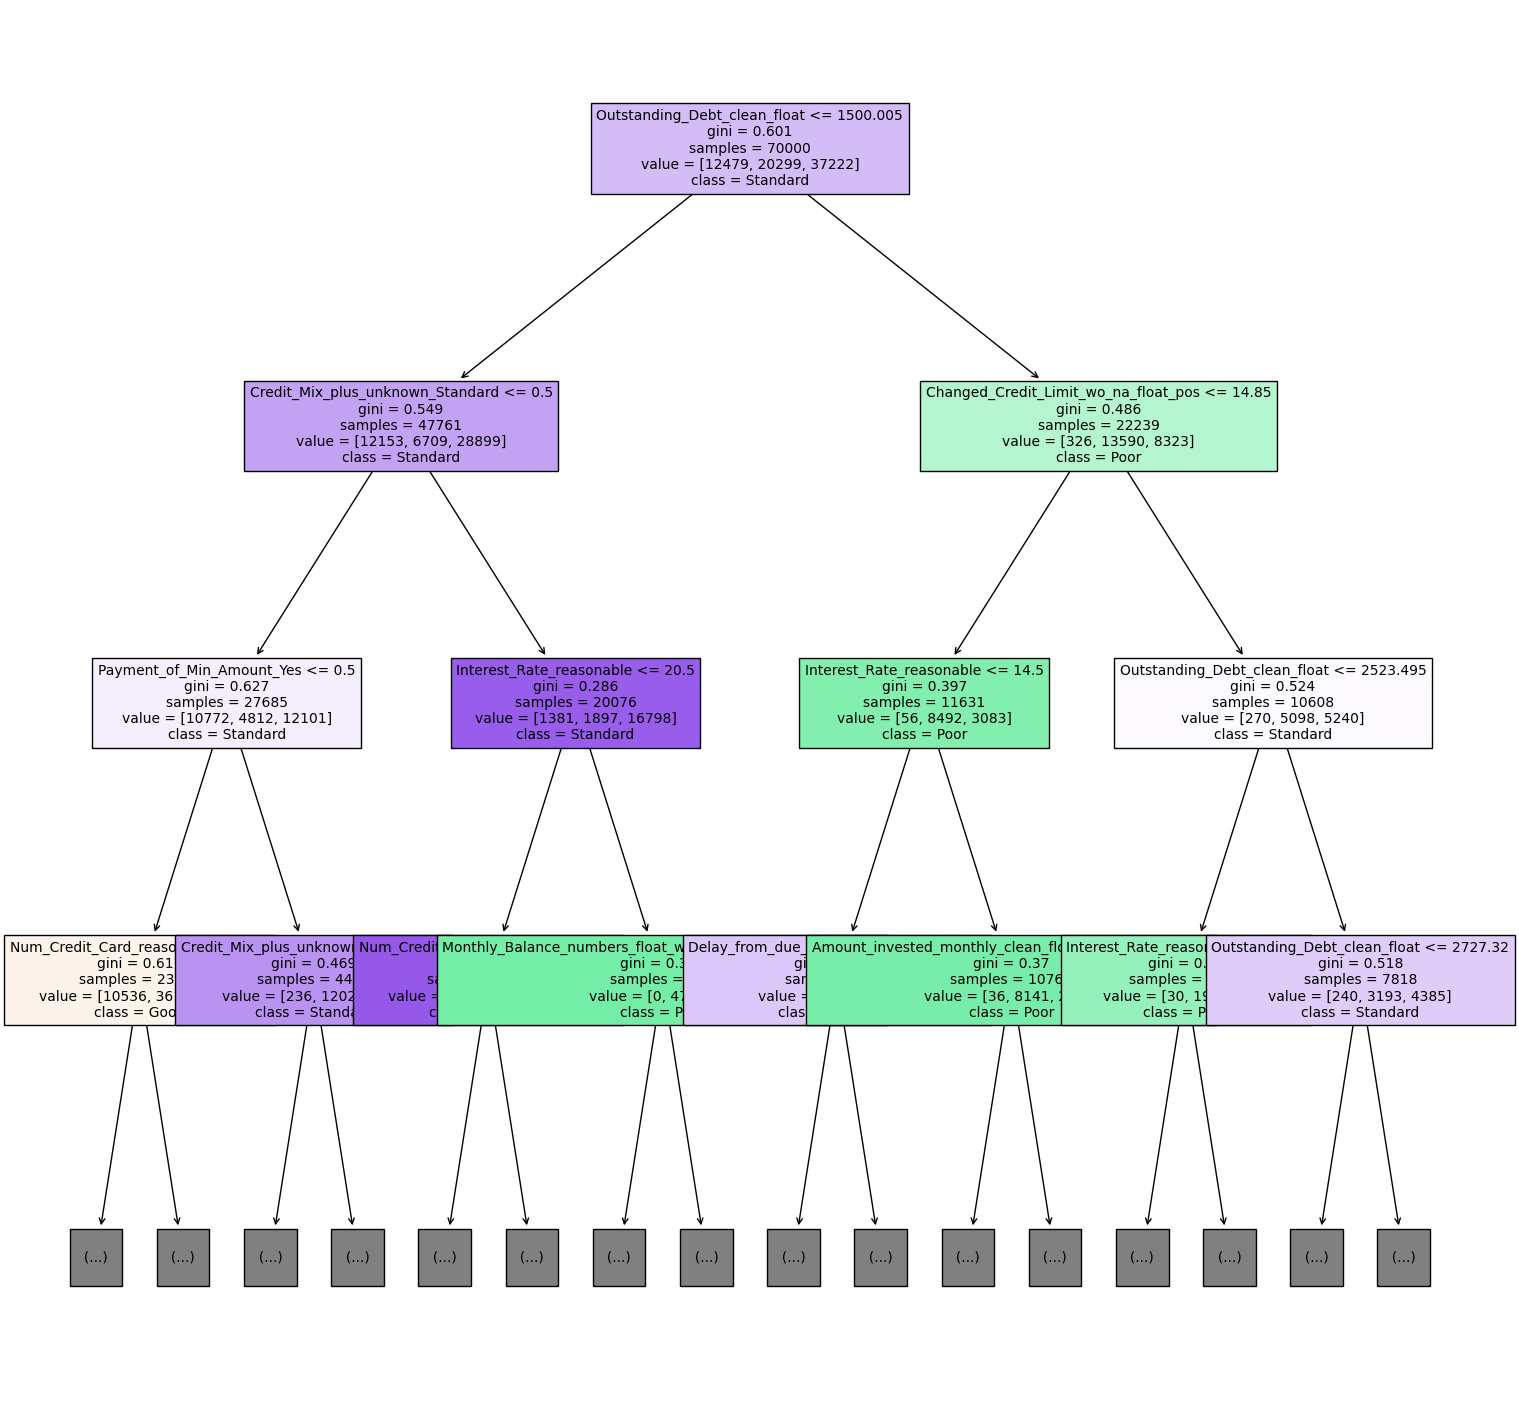

In [1431]:
plt.figure(figsize=(18,18))
plot_tree(best_tree_model_grid,feature_names = list(X_train.columns),
               class_names=["Good","Poor","Standard"],
               filled = True,max_depth = 3,fontsize=10)

## Random Forest

In [1432]:
rf = RandomForestClassifier()


### HyperParameter Tuning

In [1464]:
param_grid = {
    'max_depth': [5, 9]
}
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# param_dist = {
#     'max_depth': randint(0, 31)  # Define the range of depths to sample from
# }

In [1465]:
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

Model fit takes 1 min

In [1466]:
rf_grid = grid_search_rf.fit(X_train, y_train)
# random_search.fit(X_train, y_train)

In [1436]:
best_params_grid = grid_search_rf.best_params_
print(best_params_grid)
best_score_grid = grid_search_rf.best_score_
print(best_score_grid)
best_tree_model_rf = grid_search_rf.best_estimator_
# best_params_random = random_search.best_params_
# best_score_random = random_search.best_score_

{'max_depth': 9}
0.7016285714285714


In [1437]:
y_rf_grid = rf_grid.predict(X_test)
print(classification_report(y_test, y_rf_grid))


              precision    recall  f1-score   support

        Good       0.54      0.70      0.61      5349
        Poor       0.73      0.66      0.69      8699
    Standard       0.76      0.73      0.74     15952

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000



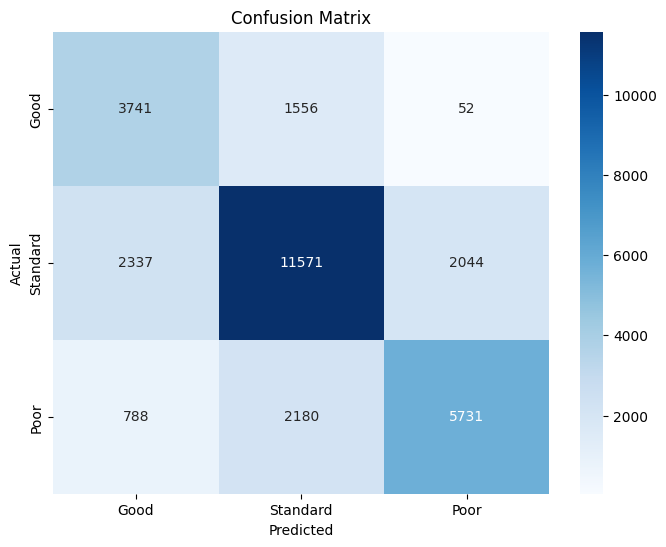

In [1438]:
cm = confusion_matrix(y_test, y_rf_grid, labels = ["Good", "Standard", "Poor"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Standard", "Poor"], yticklabels=["Good", "Standard", "Poor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

One tree visualization - 15 min. In order to save time - only first 3 layers

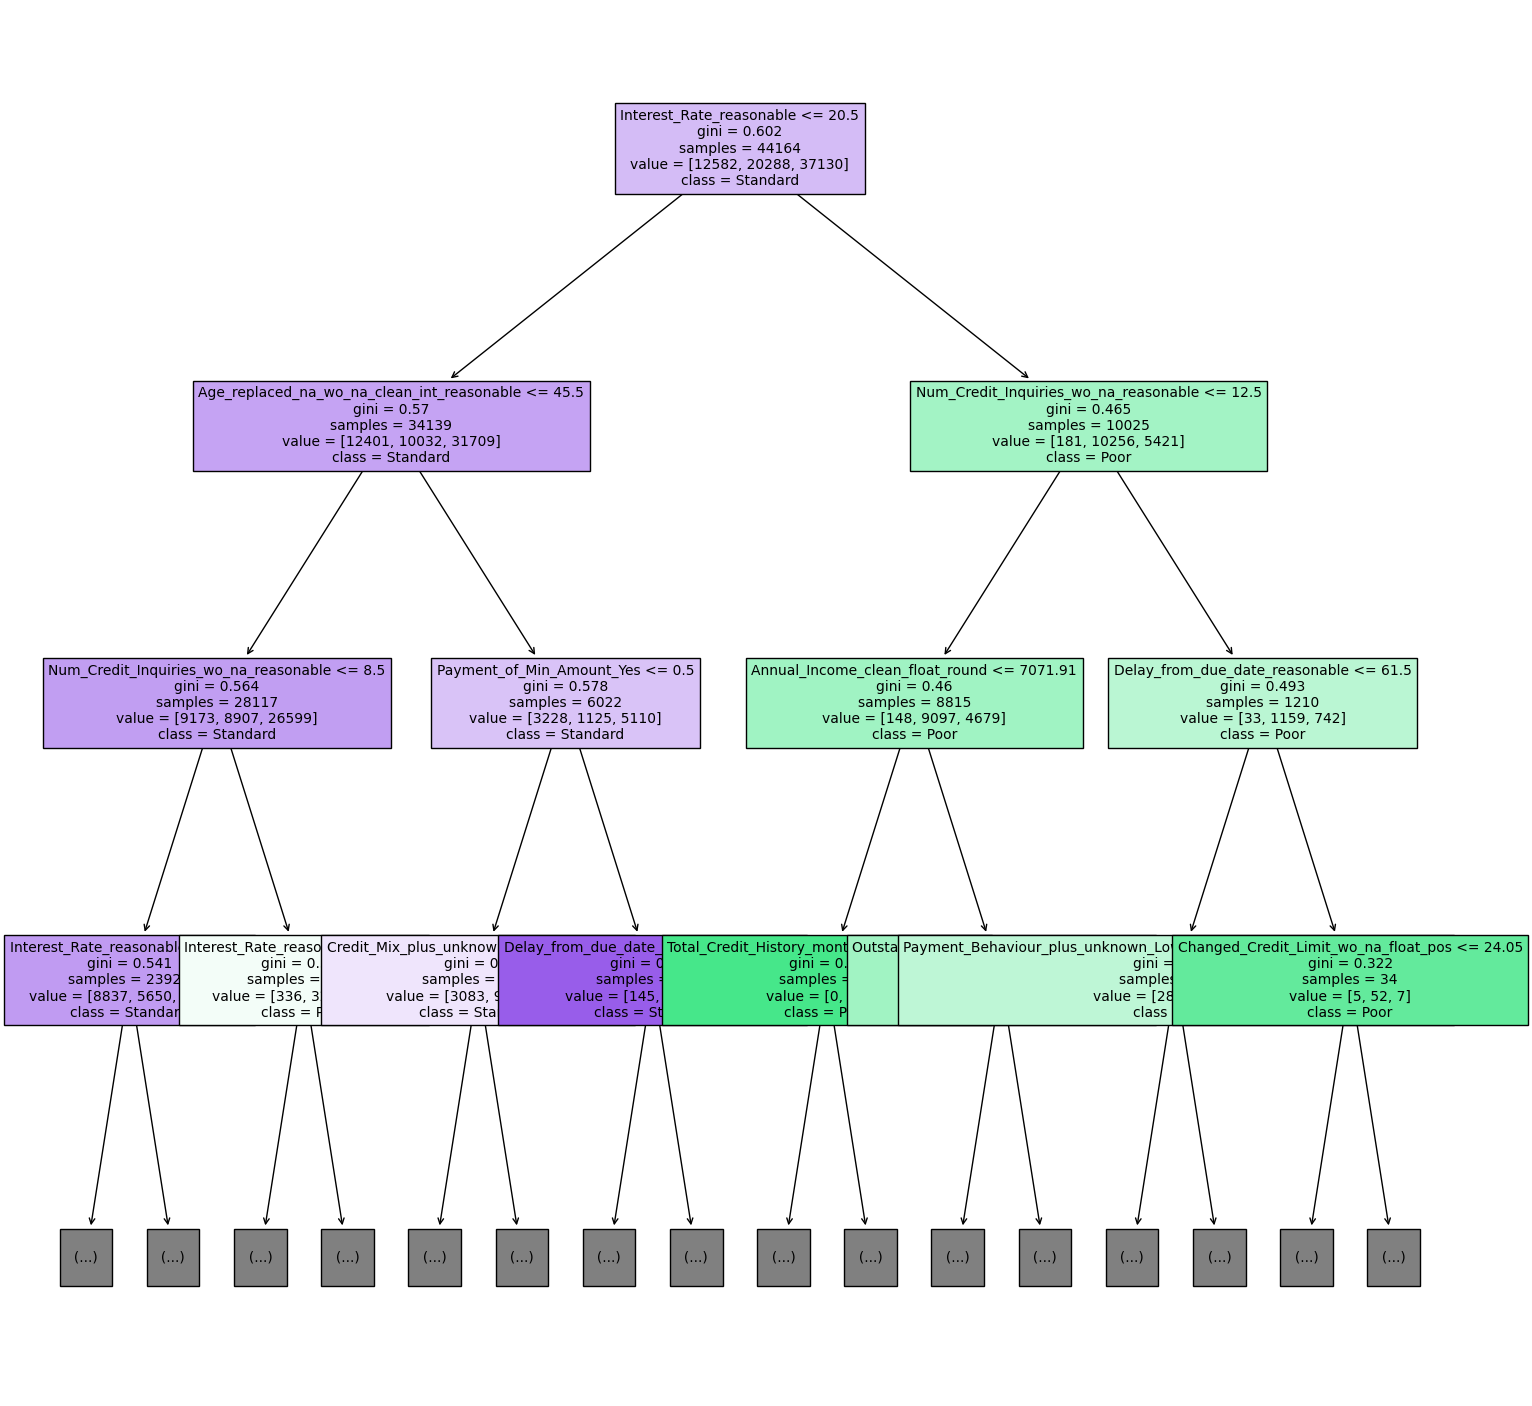

In [1439]:
one_tree = best_tree_model_rf.estimators_[0]
def plot_tree_layers(tree, feature_names, class_names, max_depth=3, filled=True, fontsize=10):
    """Plot only the first three layers of a decision tree."""
    plt.figure(figsize=(18, 18))
    plot_tree(tree, feature_names=feature_names, class_names=class_names,
                   max_depth=max_depth, filled=filled, fontsize=fontsize)
    plt.show()

# Visualize only the first three layers of the decision tree
plot_tree_layers(one_tree, feature_names=list(X_train.columns),
                 class_names=["Good", "Poor", "Standard"], max_depth=3)

## Log Reg


### All columns

In [1440]:
modelLG = LogisticRegression()
modelLG.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.5575666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      5349
        Poor       0.53      0.47      0.50      8699
    Standard       0.57      0.79      0.66     15952

    accuracy                           0.56     30000
   macro avg       0.37      0.42      0.39     30000
weighted avg       0.46      0.56      0.50     30000



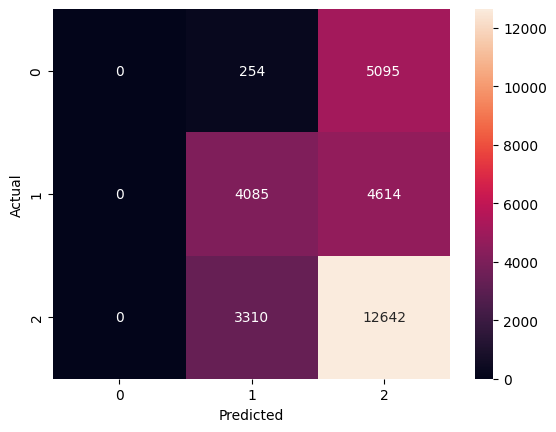

In [1441]:
y_pred = modelLG.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Conf Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


not the best performance tbh, let's try to tune it


### Only important parameters

In [1442]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [1443]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': best_model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance.head(4)


,Feature,Importance
4,Monthly_Inhand_Salary_wo_na_round,6.751041e-05
18,Credit_Mix_plus_unknown_Good,1.768964e-07
22,Payment_of_Min_Amount_No,1.473861e-07
40,Payment_Behaviour_plus_unknown_High_spent_Larg...,2.235379e-09


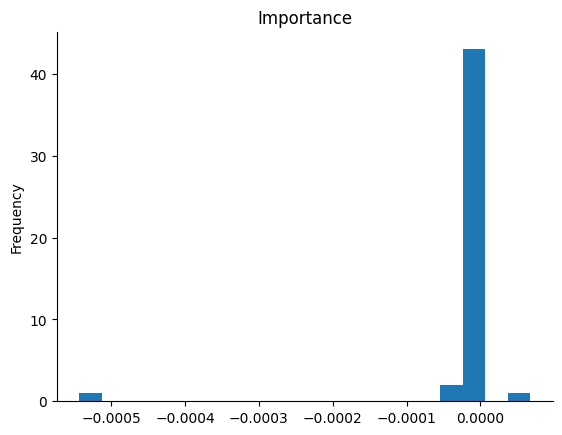

In [1444]:
from matplotlib import pyplot as plt
feature_importance['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Full dummy columns

In [1445]:
# try

X_train_very_important = X_train[['Monthly_Inhand_Salary_wo_na_round',
                             'Credit_Mix_plus_unknown_Bad', 'Credit_Mix_plus_unknown_Good',
                             'Credit_Mix_plus_unknown_Standard', 'Credit_Mix_plus_unknown_Unknown',
                           'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
                        'Payment_Behaviour_plus_unknown_High_spent_Large_value_payments']]
X_test_very_important = X_test[['Monthly_Inhand_Salary_wo_na_round',
                             'Credit_Mix_plus_unknown_Bad', 'Credit_Mix_plus_unknown_Good',
                             'Credit_Mix_plus_unknown_Standard', 'Credit_Mix_plus_unknown_Unknown',
                           'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
                        'Payment_Behaviour_plus_unknown_High_spent_Large_value_payments']]


In [1446]:
#try
modelLG_try = LogisticRegression()
modelLG_try.fit(X_train_very_important, y_train)


LogisticRegression()

Accuracy: 0.5996
              precision    recall  f1-score   support

        Good       0.48      0.59      0.53      5349
        Poor       0.60      0.39      0.47      8699
    Standard       0.64      0.72      0.68     15952

    accuracy                           0.60     30000
   macro avg       0.57      0.57      0.56     30000
weighted avg       0.60      0.60      0.59     30000



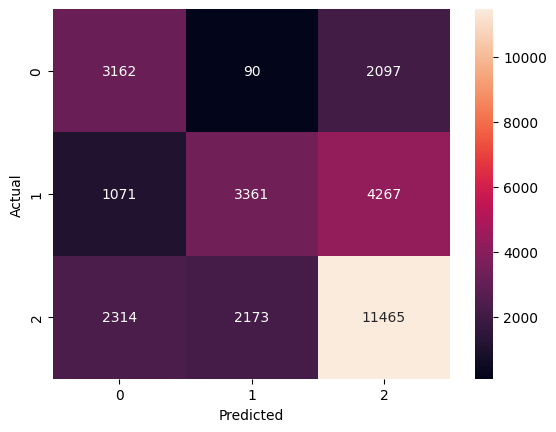

In [1447]:
#try
y_pred = modelLG_try.predict(X_test_very_important)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Conf Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

In [1448]:
knn = KNeighborsClassifier()

In [1449]:
knn_model = knn.fit(X_train, y_train)

### Standartization

In [1450]:
scaler = StandardScaler()

In [1451]:
scaler.fit(X_train)

StandardScaler()

In [1452]:
X_train_scaled = scaler.transform(X_train)

In [1453]:
X_test_scaled = scaler.transform(X_test)

In [1454]:
encoder = LabelEncoder()
#y_test_scaled_predict = knn_model.predict(X_test_scaled)
y_train_encoded = encoder.fit_transform(y_train)

### ANOVA - F test

In [1456]:
k_best = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_kbest = selector.fit_transform(X_train, y_train)
selected_features_indices = selector.get_support(indices=True)
selected_feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store feature indices and their scores
feature_importance = pd.DataFrame({'Feature Index': selected_features_indices, 'Importance': selected_feature_scores})

# Sort the DataFrame by Importance in descending order
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top 4 features with highest importance scores
print(feature_importance.head(4))

# Most impactful feature - one to visualise
print(f'Our most impactful feature is: {X_train.columns[7]}')

   Feature Index    Importance
2              7  10509.153144
7             18   9368.367769
3              9   8056.538495
4             12   7892.106638
Our most impactful feature is: Interest_Rate_reasonable


### HyperParameter Tuning

In [1457]:
param_grid = {
    'n_neighbors': [5, 9] } # Number of neighbors to consider



In [1458]:
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


Model fit takes 2 min

In [1459]:
knn_grid = grid_search_knn.fit(X_train_scaled, y_train)


In [1460]:
best_params_grid = grid_search_knn.best_params_
print(best_params_grid)
best_score_grid = grid_search_knn.best_score_
print(best_score_grid)
best_tree_model_knn = grid_search_knn.best_estimator_
best_model_knn = best_model


{'n_neighbors': 9}
0.6486571428571428


In [1461]:
y_knn_grid = knn_grid.predict(X_test_scaled)
print(classification_report(y_test, y_knn_grid))


              precision    recall  f1-score   support

        Good       0.51      0.57      0.54      5349
        Poor       0.66      0.56      0.61      8699
    Standard       0.70      0.73      0.71     15952

    accuracy                           0.65     30000
   macro avg       0.62      0.62      0.62     30000
weighted avg       0.65      0.65      0.65     30000



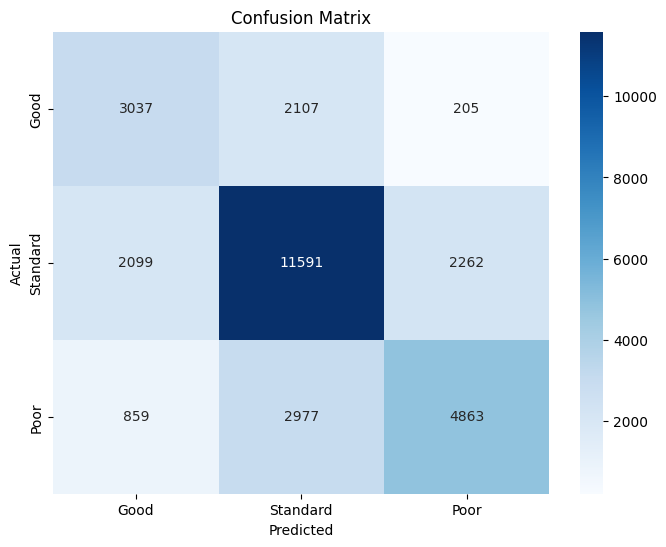

In [1462]:
cm = confusion_matrix(y_test, y_knn_grid, labels = ["Good", "Standard", "Poor"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Standard", "Poor"], yticklabels=["Good", "Standard", "Poor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

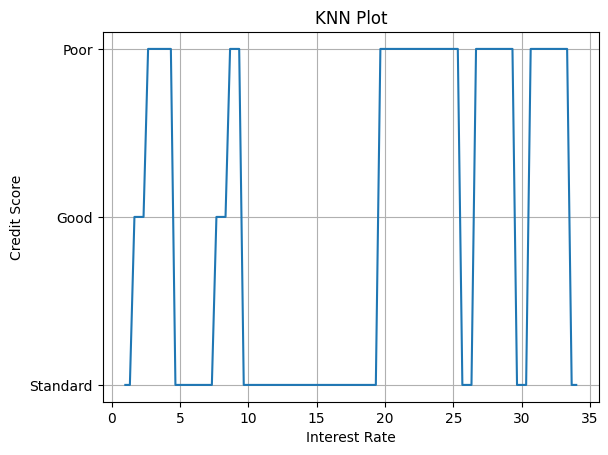

In [1463]:
x_min = X_train['Interest_Rate_reasonable'].min()
x_max = X_train['Interest_Rate_reasonable'].max()
x_values = np.linspace(x_min, x_max, 100)

# Find the indices of the nearest values in X_train['Interest_Rate_reasonable'] to the x_values
nearest_indices = np.abs(X_train['Interest_Rate_reasonable'].values[:, None] - x_values).argmin(axis=0)

# Use the indices to get the corresponding y values from y_train
y_values = y_train.iloc[nearest_indices]

# Plot the data
plt.plot(x_values, y_values)
plt.xlabel('Interest Rate')
plt.ylabel('Credit Score')
plt.title('KNN Plot')
plt.grid(True)
plt.show()

# Results

**Logreg**: accuracy: 59.96 %

Based on performance, we decided to use another model, as log reg is more suitable for binary options, but here we have 3, so performance is poor.

Precision: It's highest for the "Standard" class (64%), followed by "Poor" (60%) and "Good" (48%).

Recall: It's highest for the "Standard" class (72%), followed by "Good" (59%) and "Poor" (39%).

**KNN**: n_neighbors: 9, accuracy: 64.87 %

Perfomance of this model was 2nd worst from all of the models. Even after performing the standartisation of the data, model was not able to deliver best results.

Precision: It's highest for the "Standard" class (70%), followed by "Poor" (66%) and "Good" (51%).

Recall: It's highest for the "Standard" class (73%), followed by "Good" (57%) and "Poor" (56%).

**Random Forest** : max_depth': 9, accuracy: 70.2 %

Perfomance of this model was 2nd best from all the models. Even though this model is a ensemble, which combines different decision trees, it was not able to perform the best.

Precision: It's highest for the "Standard" class (76%), indicating fewer false positives in this category.

Recall: While it's highest for the "Good" class (70%), it's balanced across classes, with "Standard" at 72% and "Poor" at 66%.

**Decision tree** : max_depth: 9, accuracy: 70,38 %

Perfomance of this model was the best from all the models. So our peak perfomance from our project is **70.38%**.

Precision: It's highest for the "Standard" class (76%), followed by "Poor" (73%) and "Good" (56%).

Recall: It's highest for the "Good" class (69%), followed by "Standard" (74%) and "Poor" (66%).






